In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import itertools
from sklearn.model_selection import KFold
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingRegressor
from scipy.stats import randint
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Charger le jeu de données
data = pd.read_csv("houses.csv", index_col=0)

data_copy = data.copy()

# Afficher les premières lignes du jeu de données pour comprendre sa structure
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6681,3.500,3,2.25,1860,8378,2.0,0.0,0.0,3,7,1860,0,1995,0.0,98038,47.3875,-122.032,1870,8378
17798,5.925,4,3.00,2170,8240,1.0,0.0,0.0,4,8,1370,800,1968,0.0,98052,47.6291,-122.093,2020,7944
18854,2.555,2,1.00,1440,43560,1.0,0.0,0.0,4,7,1150,290,1965,0.0,98027,47.4916,-122.082,1870,56628
13478,13.300,4,2.25,3260,4640,2.0,0.0,0.0,5,9,2360,900,1907,0.0,98112,47.6272,-122.312,3240,5800
10509,3.891,2,1.00,840,5400,1.0,0.0,0.0,4,7,840,0,1948,0.0,98118,47.5489,-122.271,1340,5400


In [5]:
# feature and target

features = data.drop(columns=['price'])
target = data['price']

# Etude Statistique

In [6]:
# Afficher les informations sur le jeu de données
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13397 entries, 6681 to 10054
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          13397 non-null  float64
 1   bedrooms       13397 non-null  int64  
 2   bathrooms      13397 non-null  float64
 3   sqft_living    13397 non-null  int64  
 4   sqft_lot       13397 non-null  int64  
 5   floors         13397 non-null  float64
 6   waterfront     13397 non-null  float64
 7   view           13397 non-null  float64
 8   condition      13397 non-null  int64  
 9   grade          13397 non-null  int64  
 10  sqft_above     13397 non-null  int64  
 11  sqft_basement  13397 non-null  int64  
 12  yr_built       13397 non-null  int64  
 13  yr_renovated   13397 non-null  float64
 14  zipcode        13397 non-null  int64  
 15  lat            13397 non-null  float64
 16  long           13397 non-null  float64
 17  sqft_living15  13397 non-null  int64  
 18  sqft_lot

In [7]:
# Calculer les statistiques descriptives
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,13397.000000,13397.000000,13397.000000,13397.000000,1.339700e+04,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000,13397.000000
mean,5.411905,3.379861,2.122509,2085.261775,1.525303e+04,1.495185,0.006867,0.225648,3.412406,7.662312,1792.022542,293.030604,1971.132642,83.006494,98077.574756,47.559242,-122.213414,1987.884750,12774.004180
std,3.727862,0.938934,0.764619,919.172404,3.973164e+04,0.539493,0.082587,0.752068,0.652101,1.168484,827.231993,443.115894,29.360525,398.562717,53.391212,0.138897,0.140730,680.418605,25855.329281
min,0.820000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,660.000000
25%,3.220000,3.000000,1.750000,1430.000000,5.050000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98032.000000,47.469300,-122.328000,1490.000000,5100.000000
50%,4.500000,3.000000,2.250000,1920.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1564.000000,0.000000,1975.000000,0.000000,98065.000000,47.571500,-122.229000,1840.000000,7620.000000
75%,6.440000,4.000000,2.500000,2550.000000,1.072000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.677500,-122.123000,2360.000000,10091.000000
max,77.000000,33.000000,8.000000,13540.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,434728.000000


In [8]:
# Calculer la corrélation entre le prix de vente et les autres variables
correlation_matrix = data.corr()
price_correlation = correlation_matrix['price'].sort_values(ascending=False)
price_correlation

price            1.000000
sqft_living      0.704557
grade            0.660685
sqft_above       0.612141
sqft_living15    0.579687
bathrooms        0.526215
view             0.388199
sqft_basement    0.313674
lat              0.308731
bedrooms         0.303073
waterfront       0.271284
floors           0.258322
yr_renovated     0.118584
sqft_lot         0.086770
sqft_lot15       0.077270
yr_built         0.042693
condition        0.032885
long             0.015186
zipcode         -0.043153
Name: price, dtype: float64

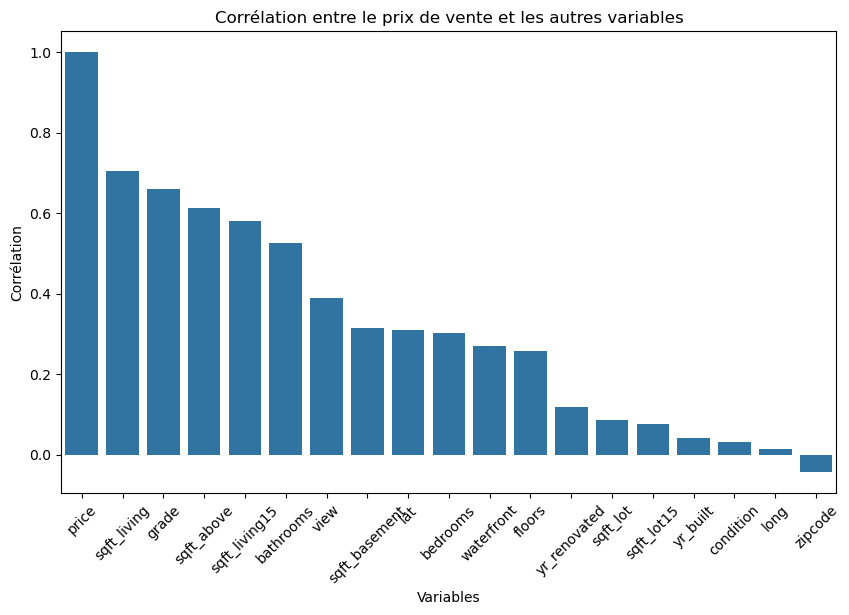

In [9]:
# Afficher les corrélations les plus importantes avec le prix de vente
plt.figure(figsize=(10, 6))
sns.barplot(x=price_correlation.index, y=price_correlation.values)
plt.title('Corrélation entre le prix de vente et les autres variables')
plt.xlabel('Variables')
plt.ylabel('Corrélation')
plt.xticks(rotation=45)
plt.show()

In [10]:
# Sélection des variables avec une corrélation significative avec le prix de vente (par exemple, corrélation absolue supérieure à 0.5)
significant_correlation = price_correlation[abs(price_correlation) > 0.2]
significant_correlation

price            1.000000
sqft_living      0.704557
grade            0.660685
sqft_above       0.612141
sqft_living15    0.579687
bathrooms        0.526215
view             0.388199
sqft_basement    0.313674
lat              0.308731
bedrooms         0.303073
waterfront       0.271284
floors           0.258322
Name: price, dtype: float64

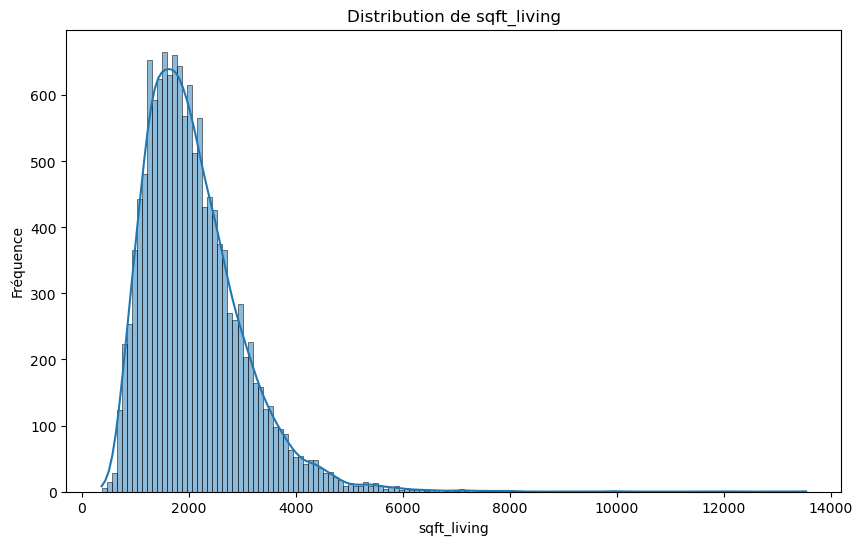

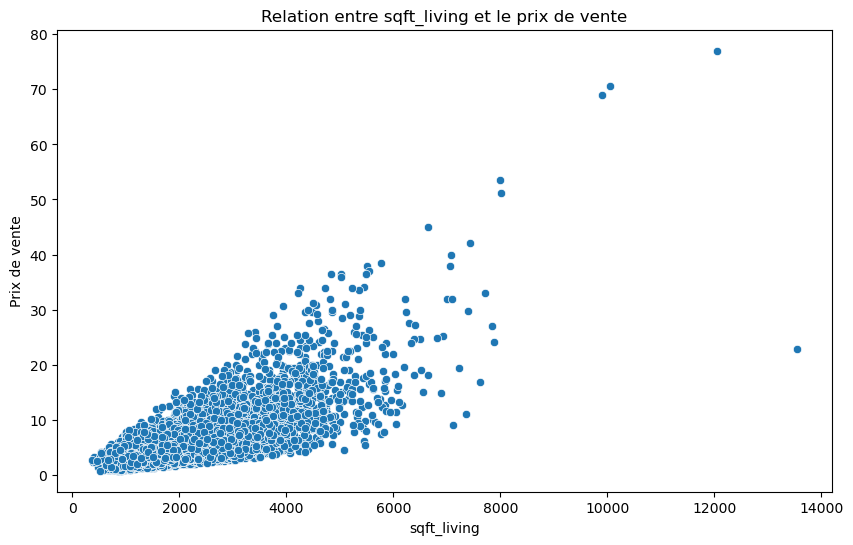

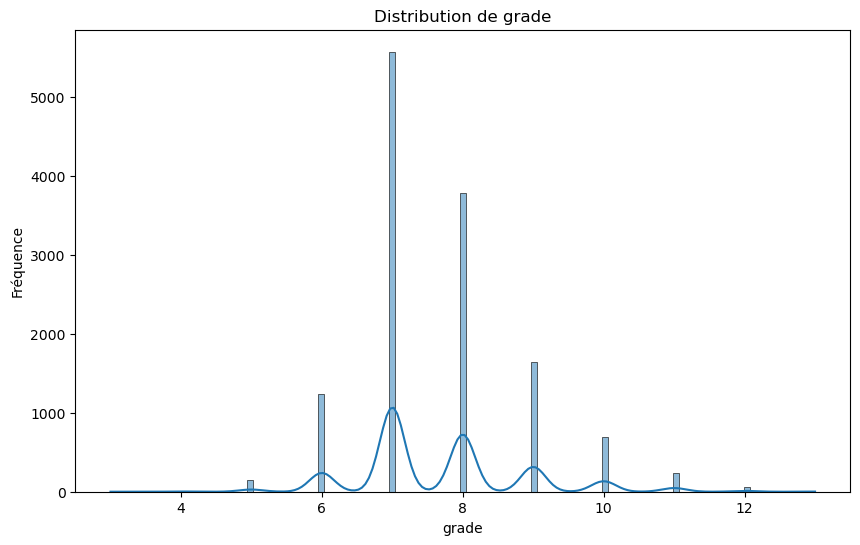

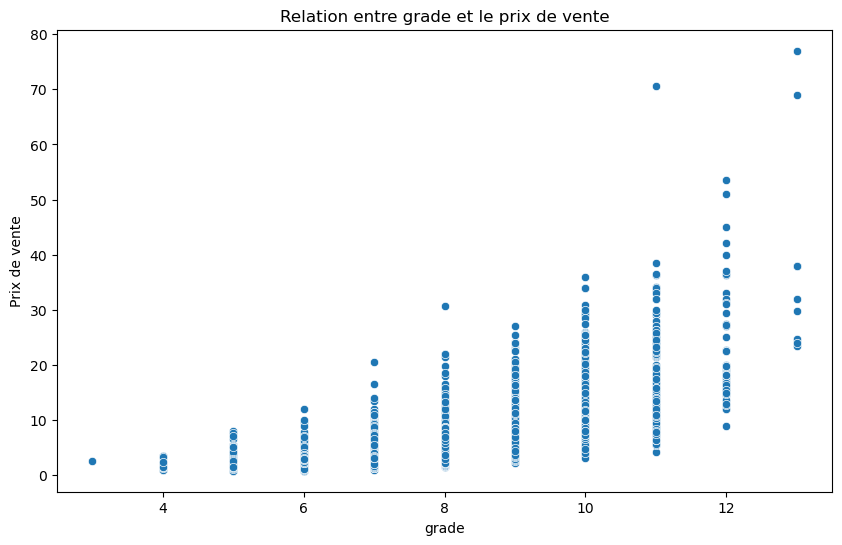

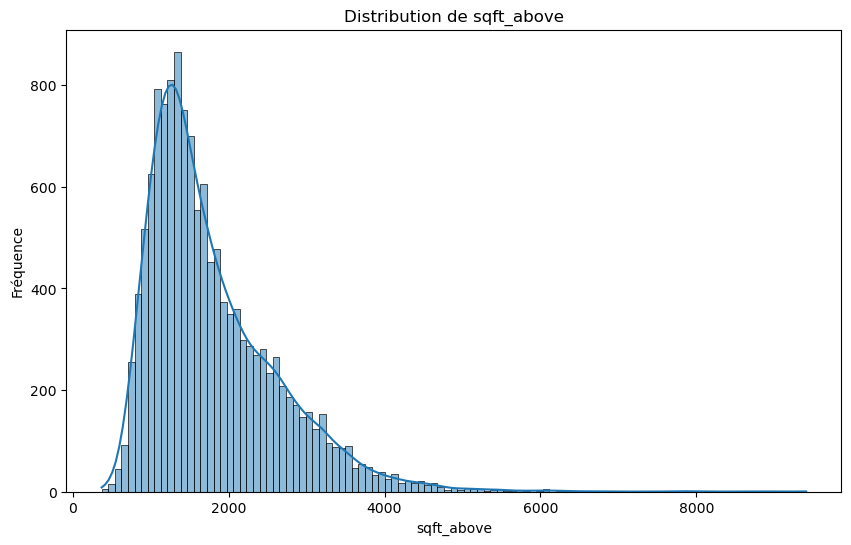

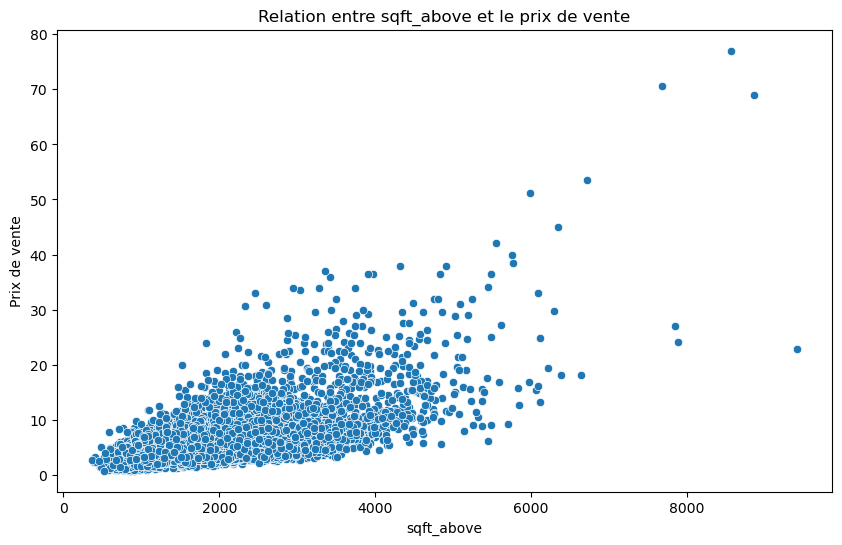

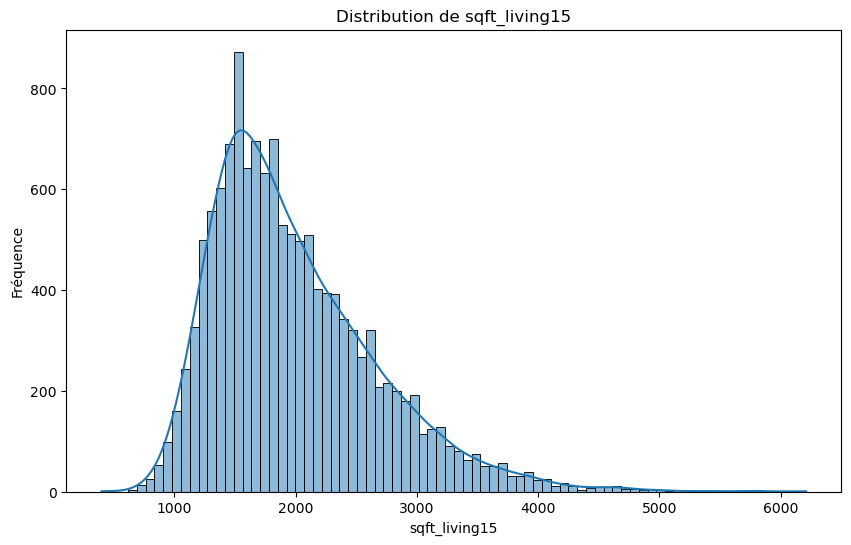

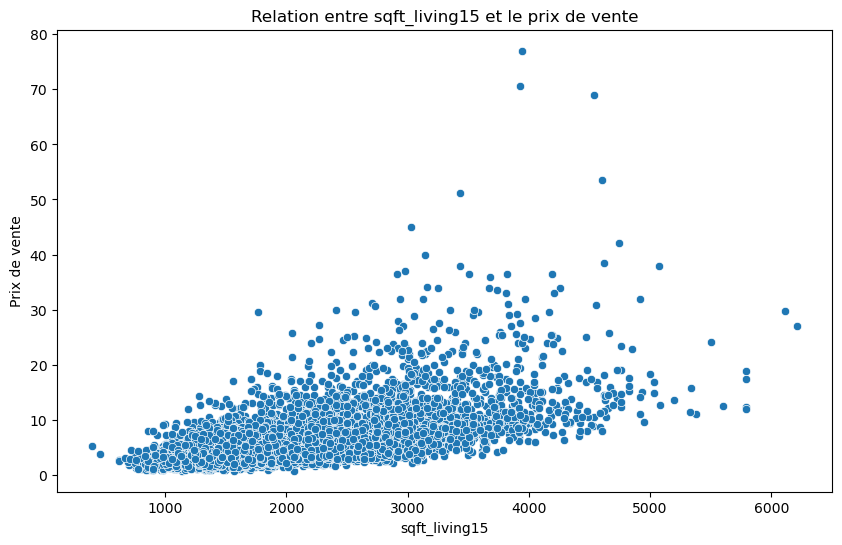

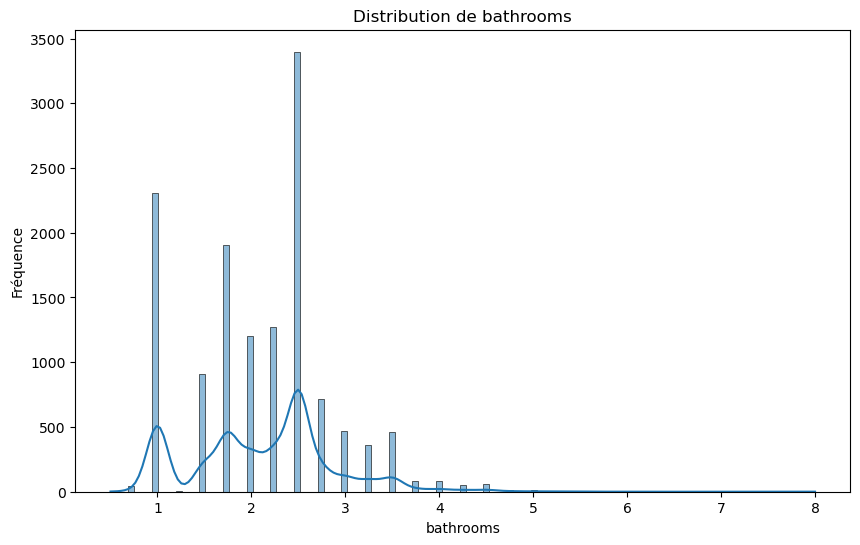

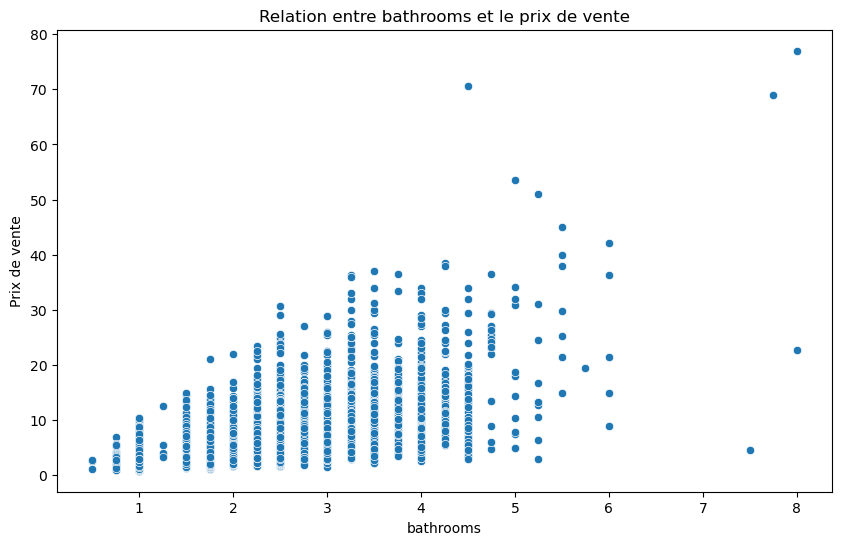

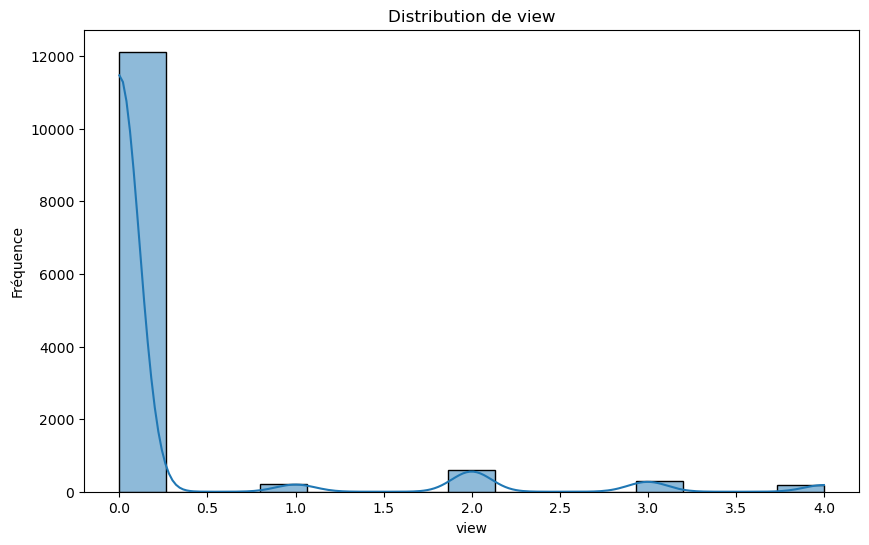

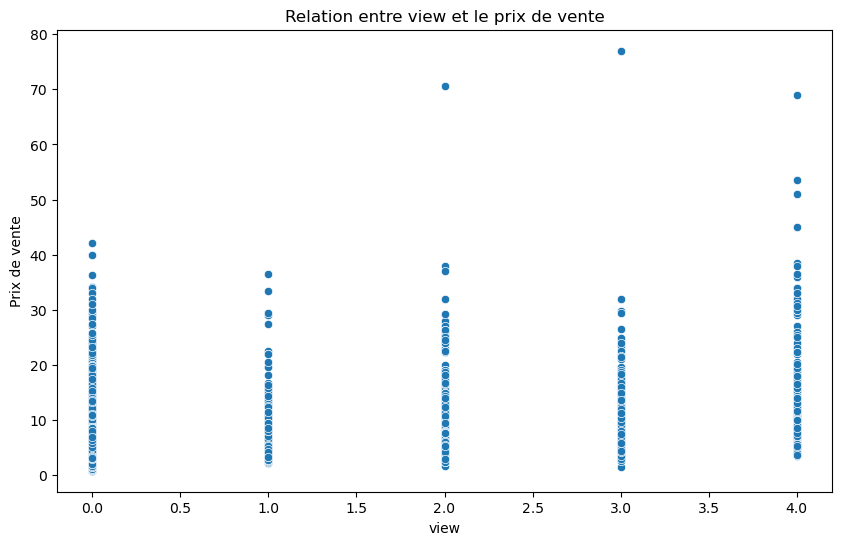

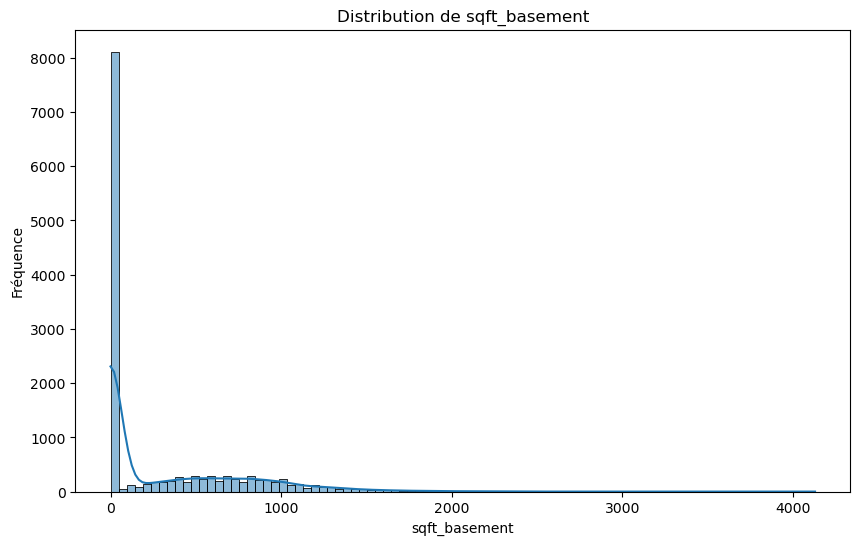

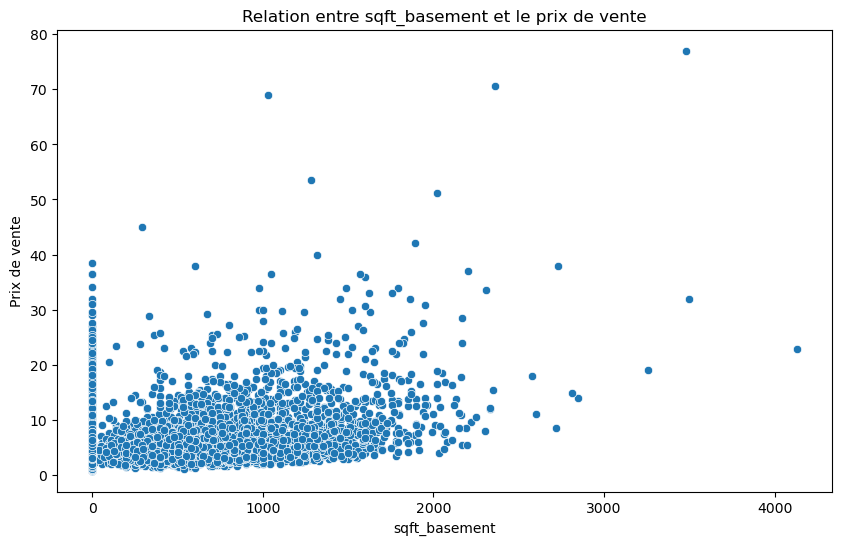

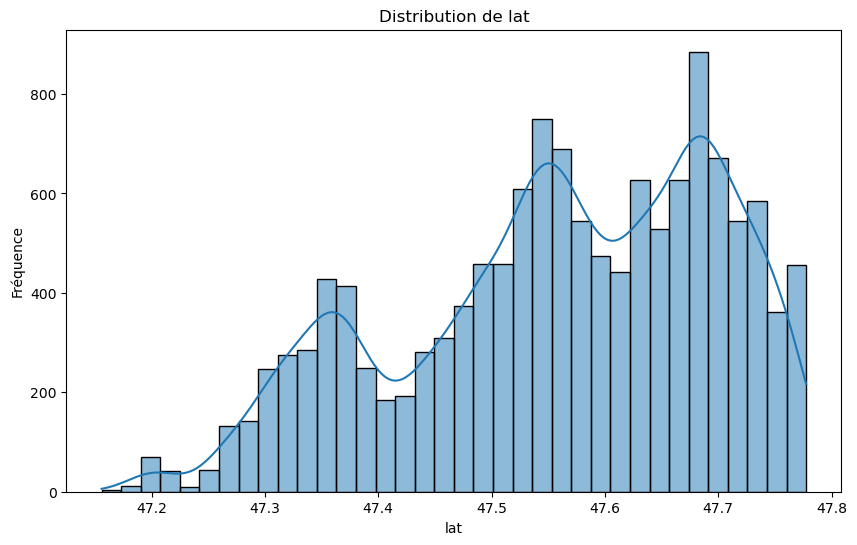

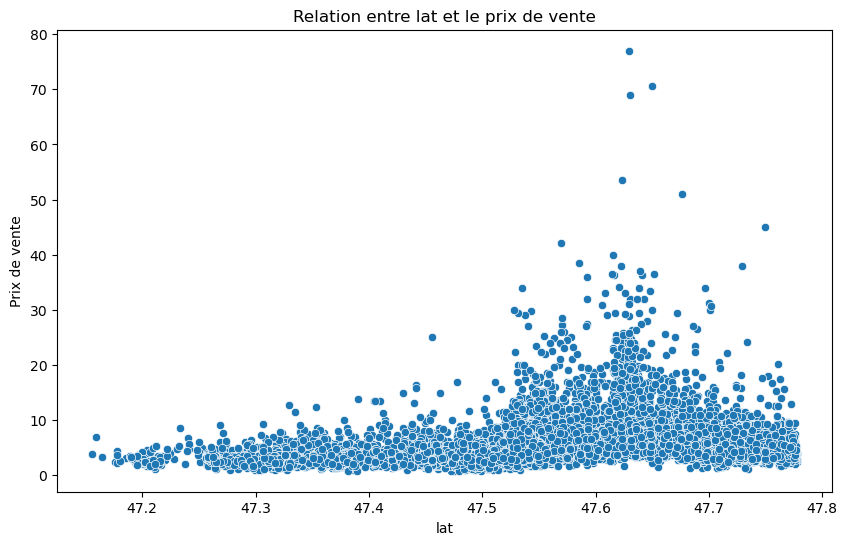

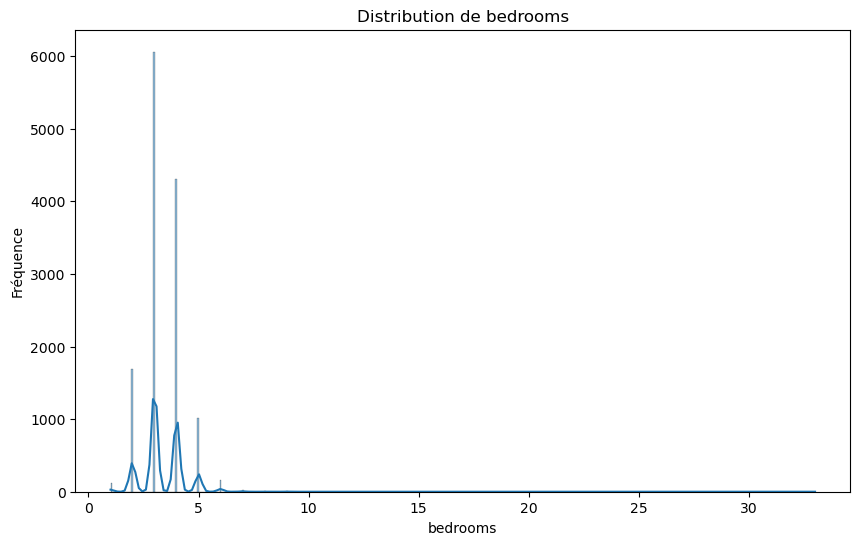

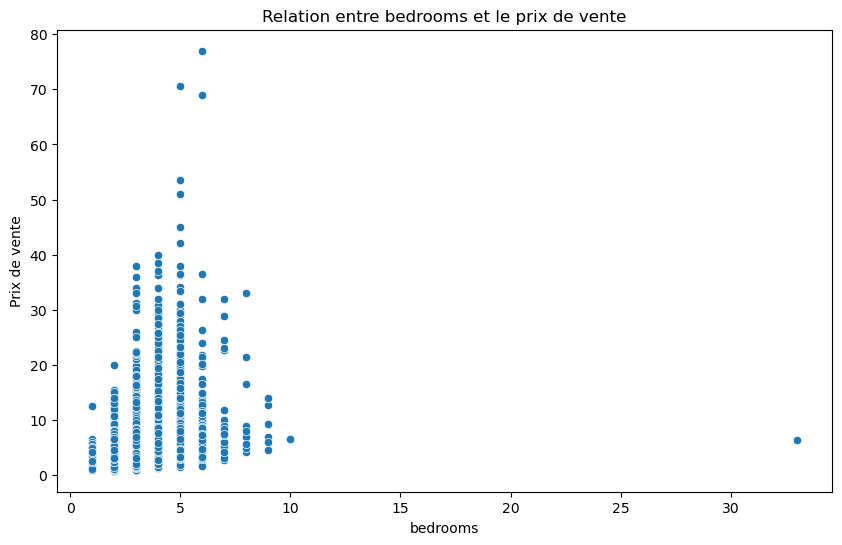

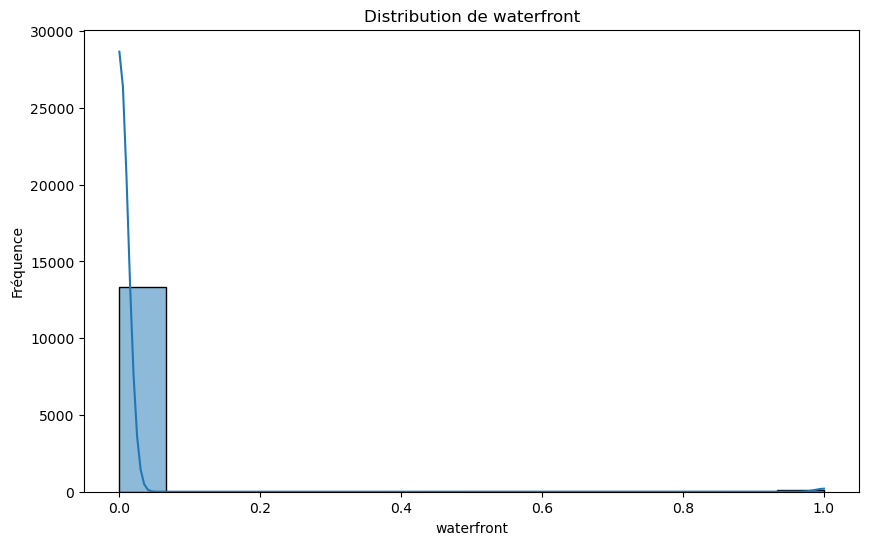

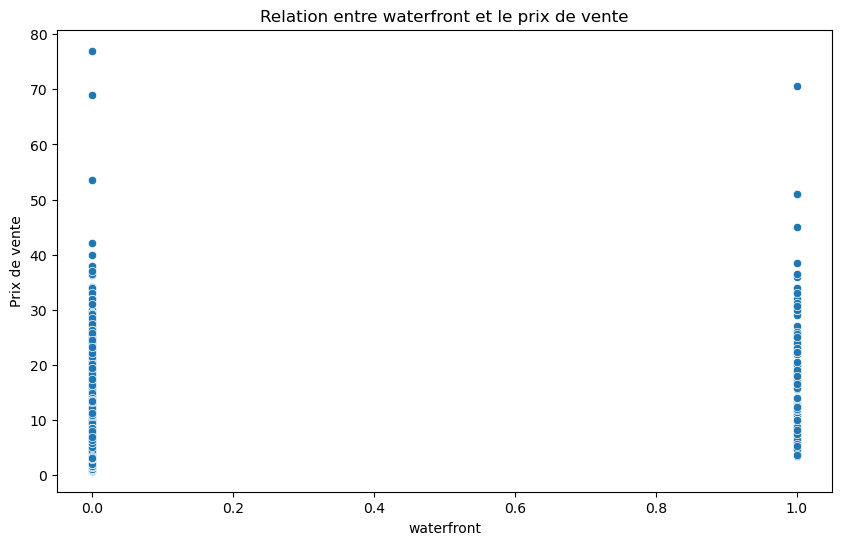

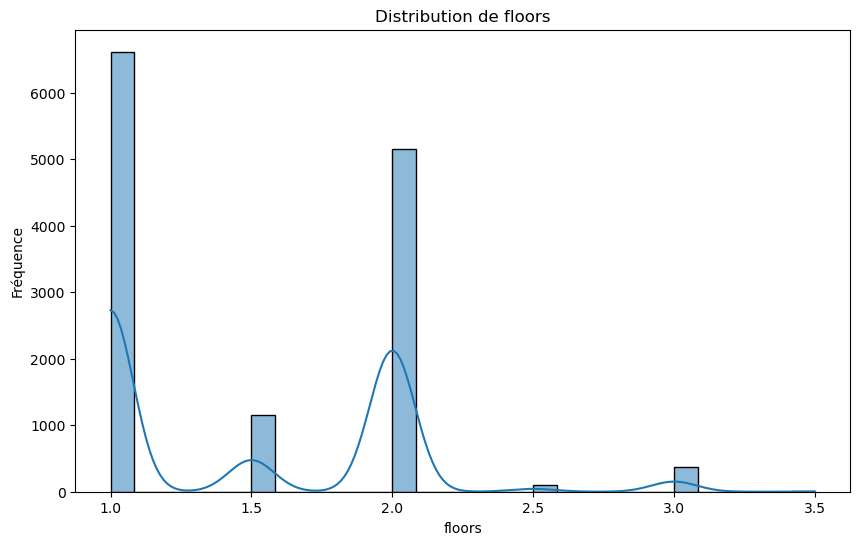

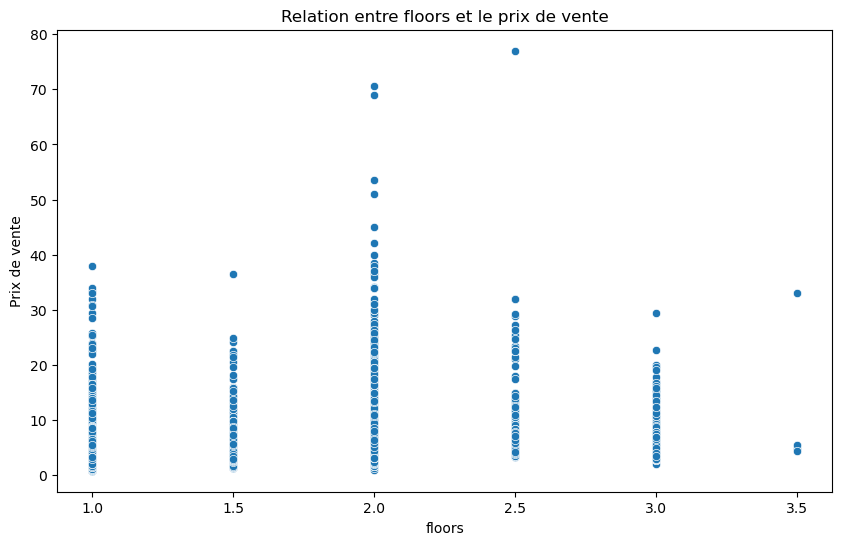

In [11]:
# Variables sélectionnées avec une corrélation > 0.2
selected_variables = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 
                      'view', 'sqft_basement', 'lat', 'bedrooms', 'waterfront', 'floors']

# Analyse de chaque variable sélectionnée
for var in selected_variables:
    # Distribution de la variable
    plt.figure(figsize=(10, 6))
    sns.histplot(data[var], kde=True)
    plt.title(f'Distribution de {var}')
    plt.xlabel(var)
    plt.ylabel('Fréquence')
    plt.show()
    
    # Relation avec le prix de vente
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=var, y='price', data=data)
    plt.title(f'Relation entre {var} et le prix de vente')
    plt.xlabel(var)
    plt.ylabel('Prix de vente')
    plt.show()
    
    # Si la variable est catégorique (comme 'view' ou 'waterfront'), afficher une boxplot
    if data[var].dtype == 'object':
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=var, y='price', data=data)
        plt.title(f'Relation entre {var} et le prix de vente')
        plt.xlabel(var)
        plt.ylabel('Prix de vente')
        plt.show()

In [105]:
# Analyse de la variance des variables
variance_analysis = data[selected_variables].var()
print("Analyse de la variance des variables :")
variance_analysis

Analyse de la variance des variables :


sqft_living      844877.907954
grade                 1.365355
sqft_above       684312.770916
sqft_living15    462969.478356
bathrooms             0.584642
view                  0.565607
sqft_basement    196351.695241
lat                   0.019292
bedrooms              0.881598
waterfront            0.006821
floors                0.291053
dtype: float64

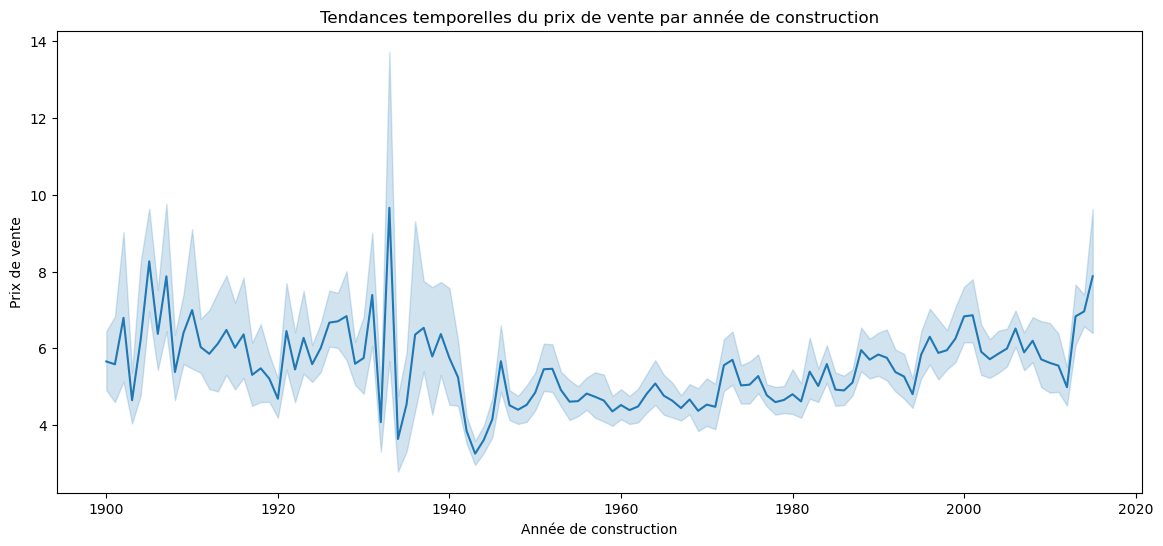

In [106]:
# Analyse des tendances temporelles du prix de vente par année de construction
plt.figure(figsize=(14, 6))
sns.lineplot(x='yr_built', y='price', data=data)
plt.title('Tendances temporelles du prix de vente par année de construction')
plt.xlabel('Année de construction')
plt.ylabel('Prix de vente')
plt.show()

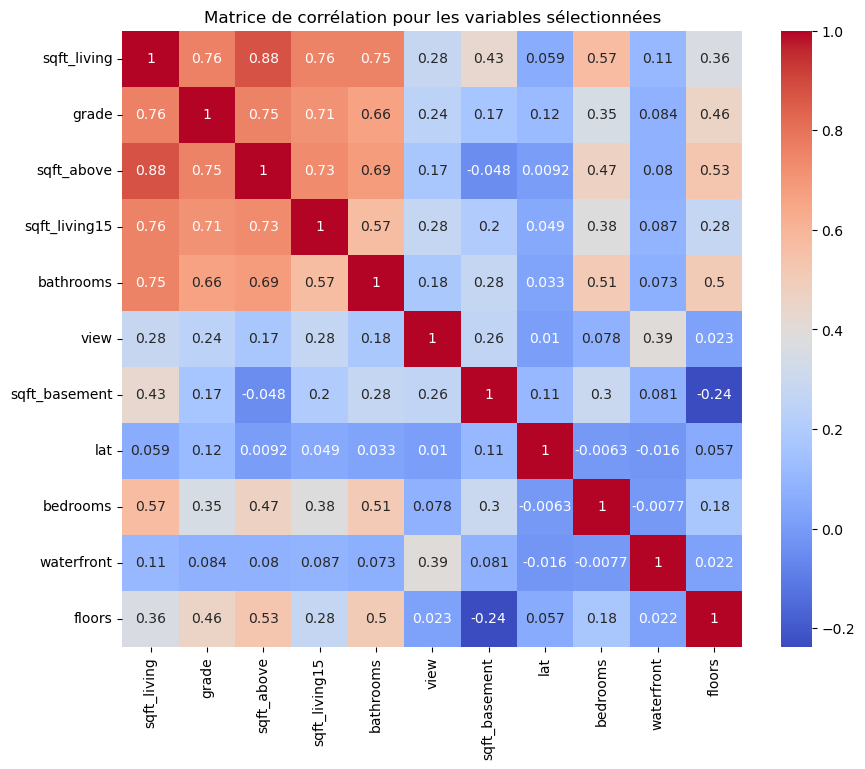

In [107]:
# Afficher une heatmap de corrélation pour les variables sélectionnées
plt.figure(figsize=(10, 8))
sns.heatmap(data[selected_variables].corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation pour les variables sélectionnées')
plt.show()

# Simple regression models

In [12]:
# Train / Test split
train, test = train_test_split(data, test_size=0.25, random_state=20)

In [13]:
def best_variable(data):
    # Initialize variables to store the best model's criteria
    best_r_squared = -np.inf
    best_ir = np.inf
    best_p_value = np.inf
    best_variable = None

    # Liste des variables prédictives
    predictors = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

    for predictor in predictors:
        X = data[predictor]
        X = sm.add_constant(X)
        Y = data['price']

        # Fit the model
        model = sm.OLS(Y, X).fit()

        # Compute R^2, I_r, and p-value for the coefficient (excluding the constant)
        r_squared = model.rsquared
        ir = np.sum(model.resid ** 2)
        p_value = model.pvalues[1]

        # Check if this variable is the best so far based on the criteria
        if r_squared > best_r_squared or (r_squared == best_r_squared and (ir < best_ir or p_value < best_p_value)):
            best_r_squared = r_squared
            best_ir = ir
            best_p_value = p_value
            best_variable = predictor

    print(f"The best variable for predicting price is: {best_variable} and its generalization error is {best_r_squared}")

In [14]:
best_variable(data)

The best variable for predicting price is: sqft_living and its generalization error is 0.49640102806105757


In [15]:
X = train.loc[:,['sqft_living']] 
X = sm.add_constant(X) 
Y = train.loc[:,['price']]
model = sm.OLS(Y, X).fit() 
# Then, we will prepare the new data so that it is under the same form as the data used to create the model,
# i.e. one constant column and one column with x1 values for the new data
X_new = test.loc[:,['sqft_living']] # only the x1 column of the new dataset
X_new = sm.add_constant(X_new) # add the constant column
# and then we can easily predict y for this new dataset:
y_pred = model.predict(X_new)
# You can see the predictions fo
y_pred

16580    10.185105
13353     4.647327
19767     3.929998
17394     4.102157
19918     6.799313
           ...    
7828      6.426302
10680     6.259882
4367      3.786532
8884      4.589941
3705      6.368916
Length: 3350, dtype: float64

In [16]:
# MSE
mean_squared_error(test.iloc[:,0],y_pred) 

7.001875041181126

#  Regression multiple

In [17]:
X = train.iloc[:,1:18] # select columns of index 1 and 2 (i.e. x1 and x2)
X = sm.add_constant(X)
Y = train.loc[:,"price"]
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     1387.
Date:                Sat, 19 Apr 2025   Prob (F-statistic):               0.00
Time:                        03:36:55   Log-Likelihood:                -21448.
No. Observations:               10047   AIC:                         4.293e+04
Df Residuals:                   10029   BIC:                         4.306e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            48.8264     43.582      1.120      0.263     -36.603     134.256
bedrooms         -0.3621      0.027    -13.282      0.000      -0.416      -0.309
bathrooms         0.4300      0.049      8.844      0.000       0.335       0.525
sqft_living       0.0019      0.000      7.388      0.000       0.001       0.002
sqft_lot      -1.005e-06   5.39e-07     -1.866      0.062   -2.06e-06    5.07e-08
floors            0.1178      0.054      2.187      0.029       0.012       0.223
waterfront        6.7208      0.273     24.626      0.000       6.186       7.256
view              0.5063      0.033     15.517      0.000       0.442       0.570
condition         0.2284      0.035      6.528      0.000       0.160       0.297
grade             0.9532      0.032     29.551      0.000       0.890       1.016
sqft_above    -1.129e-05      0.000     -0.045      0.964      -0.001       0.000
sqft_basement    -0.0002      0.000     -0.891      0.373      -0.001       0.000
yr_built         -0.0269      0.001    -25.002      0.000      -0.029      -0.025
yr_renovated      0.0002    5.4e-05      3.833      0.000       0.000       0.000
zipcode          -0.0057      0.000    -11.556      0.000      -0.007      -0.005
lat               5.9418      0.160     37.206      0.000       5.629       6.255
long             -2.2226      0.196    -11.349      0.000      -2.607      -1.839
sqft_living15     0.0002   5.21e-05      3.683      0.000    8.98e-05       0.000
==============================================================================
Omnibus:                     8997.854   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1042070.295
Skew:                           3.830   Prob(JB):                         0.00
Kurtosis:                      52.301   Cond. No.                     2.12e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
X = test.iloc[:,1:18]
X_new = sm.add_constant(X)
y_pred = model.predict(X_new)
y_pred

16580    10.669091
13353     4.793848
19767     4.934887
17394     5.074092
19918     3.840373
           ...    
7828      7.672777
10680     4.023112
4367      4.577226
8884      5.317874
3705      5.398677
Length: 3350, dtype: float64

In [19]:
# MSE
mean_squared_error(test.iloc[:,0],y_pred)

4.24647262691736

# Variable selection

### Méthode exhaustive

In [20]:
def my_regression_error_adjusted(data, idx_p, idx_t):
    #print(' la val de idx_p : ',idx_p)
    X = data.iloc[:,idx_p] 
    X = sm.add_constant(X) 
    Y = data.iloc[:,idx_t]
    mod = sm.OLS(Y, X).fit()
    
    return mod.rsquared_adj

In [21]:
def step_selection_adj(train, v_s, v_nu, idx_t) : 
    r_adjust = 0
    selected_index = -1
    result = []
    
    for j in v_nu:
        if j != idx_t:
            [2]
            variables = v_s.copy()
            variables.append(j)
            r_computed = my_regression_error_adjusted(train, variables, idx_t)
            #print(variables,"  ",r_computed)
            if(r_computed>r_adjust):
                r_adjust = r_computed
                selected_index = j
                
    return [selected_index]

In [22]:
def forward_selection_adj(train, idx_p, idx_t):    
    old_r_adjusted = 0
    actual_r_adjusted = 0
    v_s = []
    v_nu = idx_p
    
    best_var = step_selection_adj(train, [],idx_p,idx_t)
    
    v_s = v_s + best_var

    v_nu = list(set(v_nu) - set(best_var))
    old_r_adjusted = my_regression_error_adjusted(train, v_s, idx_t)
     
    for j in v_nu:
        
        best_var = step_selection_adj(train,v_s,v_nu, idx_t)
        v_s = v_s + best_var 
        v_nu = list(set(v_nu) - set(best_var))
        actual_r_adjusted = my_regression_error_adjusted(train, v_s, idx_t)
        
        
        if  actual_r_adjusted > old_r_adjusted:
            old_r_adjusted = actual_r_adjusted
        else :
            v_s = list(set(v_s) - set(best_var))
            break
        
    return v_s

In [23]:
index=[]
for i in range(1,19):
    index.append(i)
v_s = forward_selection_adj(train, index, 0) 
v_s

[1, 2, 3, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18]

In [24]:
def my_regression(data, idx_p, idx_t):
    X = data.iloc[:,idx_p] 
    X = sm.add_constant(X) 
    Y = data.iloc[:,idx_t]
    mod = sm.OLS(Y, X).fit()
    return mod

def my_prediction(my_model, data):
    
    predictors = my_model.model.exog_names
    predictors = [p for p in predictors if p != 'const']
    
    # Select and add a constant to the predictors' data
    X_new = data[predictors]
    X_new = sm.add_constant(X_new)
    
    predictions = my_model.predict(X_new)
    
    return predictions



def generalization_error_split(train, test, idx_p, idx_t):
    #model =my_regression(train,[10],0)
    #predictions = my_prediction(model,test)
    #np.mean((predictions-test.iloc[:,0])**2)
    
    mod =my_regression(train,idx_p,idx_t)
    pred = my_prediction(mod,test)
    diff = pred-test.iloc[:,idx_t]
    I_r = np.mean(diff**2)
    
    return I_r

In [25]:
#  Generalization error
Eg_exhaustive = generalization_error_split(train, test, v_s, 0)
Eg_exhaustive

4.245230688338941

### Forward search

In [26]:
def step_selection_generalization(train, v_s, v_nu, idx_t) : 
      
    r_adjust = float('inf')
    selected_index = -1
    result = []
        
    for j in v_nu:
        if j != idx_t:
            variables = v_s.copy()
            variables.append(j)
            r_computed = generalization_error_split(train,test, variables, idx_t)
            print(variables,"  ",r_computed)
            if(r_computed<r_adjust):
                r_adjust = r_computed
                selected_index = j
            
    return [selected_index]

In [27]:
def forward_selection(data, idx_p, idx_t, critical_prob=0.05):
    
    old_r_adjusted = float('inf')
    v_s = []
    v_nu = idx_p
    
    best_var = step_selection_generalization(data, [], idx_p, idx_t)
    v_s = v_s + best_var
    v_nu = list(set(v_nu) - set(best_var))
    old_r_adjusted = generalization_error_split(train, test, v_s, idx_t)

    for j in v_nu:
        best_var = step_selection_generalization(data, v_s, v_nu, idx_t)
        v_s = v_s + best_var 
        v_nu = list(set(v_nu) - set(best_var))
        actual_r_adjusted = generalization_error_split(train, test, v_s, idx_t)
        
        # Vérifier la significativité de la variable ajoutée
        model = my_regression(data, v_s, idx_t)
        p_value = model.pvalues[j]
        significant = p_value < critical_prob
        
        if actual_r_adjusted < old_r_adjusted and significant:
            old_r_adjusted = actual_r_adjusted
        else:
            v_s = list(set(v_s) - set(best_var))
            break
        
    return v_s

In [28]:
v_s = forward_selection(data, index, 0)
print("la liste de variable optimale est : ")
v_s

[1]    12.059417389125601
[2]    9.96804361158127
[3]    7.000956647444795
[4]    13.38038660414699
[5]    12.694493810439551
[6]    12.614776619778398
[7]    11.60475066818183
[8]    13.507166684102994
[9]    7.835886176165072
[10]    8.31993540446035
[11]    12.581072947150595
[12]    13.497305011354054
[13]    13.27741627361288
[14]    13.503045044490749
[15]    12.18105323486134
[16]    13.513537958868207
[17]    9.227548785773216
[18]    13.433941308507436
[3, 1]    6.851231624023739
[3, 2]    6.999258532825775
[3, 4]    6.993609029985035
[3, 5]    7.000844484544598
[3, 6]    6.52401931209904
[3, 7]    6.505393293144699
[3, 8]    6.882927004200119
[3, 9]    6.552819795125158
[3, 10]    7.010074320609221
[3, 11]    7.010294860985748
[3, 12]    6.47574397445407
[3, 13]    6.903922176859313
[3, 14]    6.862632939788502
[3, 15]    5.954942444967013
[3, 16]    6.6720928437401605
[3, 17]    6.93379252076245
[3, 18]    6.982484539202359
[3, 15, 1]    5.839876719813284
[3, 15, 2]    5.954

[1, 2, 3, 6, 7, 8, 9, 10, 12, 14, 15, 16]

In [29]:
# Generalization error
Eg_forward = generalization_error_split(train, test, [1, 2, 3, 6, 7, 8, 9, 10, 12, 14, 15, 16], 0)
Eg_forward

4.2323468149235115

In [30]:
# comparaison des deux précédentes méthodes

if Eg_forward < Eg_exhaustive:
    print("Le meilleur model est : Celui avec la méthode Forward Seach")
elif Eg_exhaustive < Eg_forward: 
    print("Le meilleur model est : Celui avec la méthode Exhaustive")

Le meilleur model est : Celui avec la méthode Forward Seach


### Backward search

In [31]:
def backward_selection(data, idx_p, idx_t, critical_prob=0.05):
    # Initialisation des variables
    v_s = idx_p.copy()  # Commencer avec toutes les variables
    best_error = float('inf')
    best_variables = v_s.copy()
    
    # Boucle de sélection arrière
    while len(v_s) > 1:  # Tant qu'il reste plus d'une variable
        # Sélectionner la variable à retirer de v_s pour minimiser l'erreur de généralisation
        min_error = float('inf')
        variable_to_remove = None
        for j in v_s:
            variables = v_s.copy()
            variables.remove(j)
            error = generalization_error_split(data, data, variables, idx_t)
            
            # Vérifier si toutes les variables sélectionnées sont significatives
            p_values = my_regression(data, variables, idx_t).pvalues[1:]  # Exclure l'intercept
            all_significant = all(p < critical_prob for p in p_values)
            
            # Vérifier si aucune des variables restantes n'est significative une fois retirée
            other_variables = set(v_s) - set([j])
            other_variables_significant = any(p < critical_prob for p in p_values if p in other_variables)
            
            # Vérifier si le critère d'arrêt est rempli
            if all_significant and not other_variables_significant:
                # Si oui, sélectionner cette variable pour la suppression
                variable_to_remove = j
                break
            
            # Si le critère d'arrêt n'est pas rempli, vérifier si l'erreur est la meilleure jusqu'à présent
            if error < min_error:
                min_error = error
                variable_to_remove = j
        
        # Si une meilleure variable à supprimer a été trouvée, mettre à jour v_s
        if variable_to_remove is not None:
            v_s.remove(variable_to_remove)
            
            # Vérifier si l'erreur de généralisation a diminué
            if min_error < best_error:
                best_error = min_error
                best_variables = v_s.copy()
            else:
                # Si l'erreur de généralisation a augmenté, arrêter la boucle
                break
        else:
            # Si aucune meilleure variable n'a été trouvée pour la suppression, arrêter la boucle
            break
    
    return best_variables

In [32]:
# Utilisation de la méthode de recherche arrière pour sélectionner les variables optimales
best_variables_backward = backward_selection(data, index, 0)
print("Variables sélectionnées (Backward) :", best_variables_backward)

Variables sélectionnées (Backward) : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18]


In [33]:
# Generalization error
Eg_backward = generalization_error_split(train, test, [1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18], 0)
Eg_backward

4.2448754616576965

In [34]:
# comparaison

min_err = min(Eg_forward, Eg_exhaustive, Eg_backward)
if min_err == Eg_exhaustive:
    print("Le meilleur model est : Celui avec la méthode Exhaustive")
elif min_err == Eg_forward:
    print("Le meilleur model est : Celui avec la méthode Forward Seach")
else:
    print("Le meilleur model est : Celui avec la méthode Backward Search")

Le meilleur model est : Celui avec la méthode Forward Seach


## K-Fold

In [35]:
def k_fold_cross_validation(data, model,idx_p, idx_t, min_k=4, max_k=30):
    best_mean_mse = float('inf')
    best_k = None

    for k in range(min_k, max_k + 1):
        kf = KFold(n_splits=k, shuffle=True, random_state=20)
        mses = []

        for train_index, test_index in kf.split(data):
            train_fold, test_fold = data.iloc[train_index], data.iloc[test_index]
            model_ = model(train_fold, idx_p, idx_t)
            y_pred = my_prediction(model_, test_fold)
            mse = mean_squared_error(test_fold.iloc[:, idx_t], y_pred)
            mses.append(mse)

        mean_mse = np.mean(mses)

        if mean_mse < best_mean_mse:
            best_mean_mse = mean_mse
            best_k = k

    return best_k, best_mean_mse

In [36]:
best_k, best_mean_mse = k_fold_cross_validation(data, my_regression,index, 0)
print("Meilleur nombre de splits (k):", best_k)
print("Meilleur MSE moyen:", best_mean_mse)

Meilleur nombre de splits (k): 8
Meilleur MSE moyen: 4.22925226080198


In [37]:
# comparaison

min_err = min(Eg_forward, Eg_exhaustive, Eg_backward, best_mean_mse)
if min_err == Eg_exhaustive:
    print("Le meilleur model est : Celui avec la méthode Exhaustive")
elif min_err == Eg_forward:
    print("Le meilleur model est : Celui avec la méthode Forward Seach")
elif min_err == best_mean_mse:
    print("Le meilleur model est : Celui avec la méthode de K-Fold")
else:
    print("Le meilleur model est : Celui avec la méthode Backward Search")

Le meilleur model est : Celui avec la méthode de K-Fold


# Modèles non linéaires

In [38]:
def add_polynomial_feature(data, idx_p, power):
    new_data = data.copy(deep = True)
    for i in range(0, len(idx_p)):
        for j in power:
            for k in range(2, j+1):
                new_data['{}_pow_{}'.format(new_data.columns[idx_p[i]],k)] = new_data.iloc[:,idx_p[i]]**k
    return new_data

In [39]:
train_poly = add_polynomial_feature(train, v_s, [2])
train_poly
# You can see a new column with values of x8^2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_living_pow_2,waterfront_pow_2,view_pow_2,condition_pow_2,grade_pow_2,sqft_above_pow_2,yr_built_pow_2,zipcode_pow_2,lat_pow_2,long_pow_2
1859,4.05000,2,1.75,1710,4234,2.0,0.0,0.0,3,7,...,2924100,0.0,0.0,9,49,1768900,3686400,9630674496,2259.281518,14978.332996
13917,2.46000,3,1.50,1780,23819,1.0,0.0,0.0,3,7,...,3168400,0.0,0.0,9,49,3168400,3814209,9636956224,2255.414077,14960.225344
14909,13.40000,4,3.00,2760,4905,2.0,0.0,1.0,4,9,...,7617600,0.0,1.0,16,81,3385600,3755844,9624591025,2271.389813,14949.952900
19057,4.25000,3,2.50,2650,144183,1.0,0.0,0.0,3,8,...,7022500,0.0,0.0,9,64,7022500,3869089,9612233764,2248.770209,14919.156736
5436,6.38500,4,1.75,1770,12462,1.0,0.0,2.0,4,8,...,3132900,0.0,4.0,16,64,3132900,3849444,9636563556,2250.126660,14966.586244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21031,3.02059,4,2.00,1390,745,3.0,0.0,0.0,3,7,...,1932100,0.0,0.0,9,49,1932100,4032064,9609292729,2259.985044,14890.344676
10571,2.66200,3,1.50,1430,9600,1.0,0.0,0.0,4,7,...,2044900,0.0,0.0,16,49,2044900,3865156,9615567481,2253.752192,14920.622500
11483,4.55000,2,1.50,1020,1146,3.0,0.0,0.0,3,7,...,1040400,0.0,0.0,9,49,1040400,4004001,9626553225,2273.134471,14963.405625
21039,4.71275,4,2.50,3361,5038,2.0,0.0,0.0,3,9,...,11296321,0.0,0.0,9,81,11296321,4056196,9622040464,2239.835464,14924.287225


In [40]:
test_poly = add_polynomial_feature(test, v_s, [2])
test_poly
# Same for test

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_living_pow_2,waterfront_pow_2,view_pow_2,condition_pow_2,grade_pow_2,sqft_above_pow_2,yr_built_pow_2,zipcode_pow_2,lat_pow_2,long_pow_2
16580,13.1000,4,2.25,3750,5000,2.0,0.0,0.0,5,8,...,14062500,0.0,0.0,25,64,5953600,3701776,9626553225,2272.877020,14958.023809
13353,5.2500,4,1.75,1820,6600,1.0,0.0,0.0,5,7,...,3312400,0.0,0.0,25,49,3312400,3841600,9605372049,2266.331236,14916.958225
19767,4.1495,3,2.50,1570,1551,3.0,0.0,0.0,3,8,...,2464900,0.0,0.0,9,64,2464900,4032064,9624198609,2274.917955,14967.320281
17394,5.5700,3,2.50,1630,1587,3.0,0.0,0.0,3,8,...,2656900,0.0,0.0,9,64,2656900,4016016,9624983449,2272.362162,14980.046449
19918,3.3999,3,2.50,2570,4600,2.0,0.0,0.0,3,8,...,6604900,0.0,0.0,9,64,6604900,4056196,9622040464,2233.337467,14931.862416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7828,7.2500,4,2.75,2440,7042,1.5,0.0,2.0,4,7,...,5953600,0.0,4.0,16,49,2689600,3767481,9626749456,2263.199844,14983.718464
10680,3.4500,4,2.50,2382,5899,2.0,0.0,0.0,3,8,...,5673924,0.0,0.0,9,64,5673924,4044121,9604588009,2235.332208,14956.067025
4367,4.9995,4,1.75,1520,7700,1.0,0.0,0.0,4,7,...,2310400,0.0,0.0,16,49,2310400,3869089,9610665156,2278.687507,14930.640481
8884,4.4000,3,2.00,1800,10950,1.0,0.0,0.0,4,8,...,3240000,0.0,0.0,16,64,3240000,3928324,9605176036,2261.668249,14923.798569


In [41]:
model_polynomial = my_regression(train_poly,index,0)
Eg_poly = generalization_error_split(train_poly, test_poly,index,0)
Eg_poly

4.245093045419049

In [42]:
min_err = min(Eg_forward, Eg_exhaustive, Eg_poly, Eg_backward, best_mean_mse)
if min_err == Eg_exhaustive:
    print("Le meilleur model est : Celui avec la méthode Exhaustive")
elif min_err == Eg_forward:
    print("Le meilleur model est : Celui avec la méthode Forward Seach")
elif min_err == Eg_backward:
    print("Le meilleur model est : Celui avec la méthode Backward Seach")
elif min_err == best_mean_mse:
    print("Le meilleur model est : Celui avec la méthode de K-Fold")
else:
    print("Le meilleur model est : Celui avec la méthode Non Lineair")

Le meilleur model est : Celui avec la méthode de K-Fold


In [43]:
model = my_regression(train, [1, 2, 3, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18], 0)
houses_competition=pd.read_csv('houses_competition.csv', index_col=0)

pred = my_prediction(model,houses_competition)
pred
# pred = pd.DataFrame ({'ID': pred.index, 'price': pred})
# pred.to_csv ('my_submission6.csv', index = False)


15529     3.909185
3233      3.417360
14381     6.119442
3201     12.273636
3425      2.012658
           ...    
7989      5.020793
9973      3.611612
9007      4.079590
16345    13.813133
13582     0.293924
Length: 2365, dtype: float64

In [46]:
model = my_regression (train_poly,index,0)
houses_competition = pd.read_csv('houses_competition.csv', index_col=0)

pred = my_prediction(model,houses_competition)
pred = pd.DataFrame ({'ID': pred.index, 'price': pred})
pred.to_csv ('my_submission5.csv', index = False)

# Amélioration de la performance de prédiction avec de nouveaux modèle de regression

### Creating the pipeline with the models to we do a first evaluate of their power to this problem

In [141]:
########################################################
######## IMPORTING NECESSARY MODULES AND MODELS ########
########################################################

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split # Model evaluation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler # Preprocessing
from sklearn.linear_model import Lasso, Ridge, ElasticNet, RANSACRegressor, SGDRegressor, HuberRegressor, BayesianRidge # Linear models
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor  # Ensemble methods
from xgboost import XGBRegressor, plot_importance # XGBoost
from sklearn.svm import SVR, SVC, LinearSVC  # Support Vector Regression
from sklearn.tree import DecisionTreeRegressor # Decision Tree Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline # Streaming pipelines
from sklearn.decomposition import KernelPCA, PCA # Dimensionality reduction
from sklearn.feature_selection import SelectFromModel # Dimensionality reduction
from sklearn.model_selection import learning_curve, validation_curve, GridSearchCV # Model evaluation
from sklearn.base import clone # Clone estimator

In [142]:
X = data.drop("price",axis=1).values
y = data["price"].values

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

### Creating the pipeline with the models to we do a first evaluate of their power to this problem

In [144]:
pipelines = []
seed = 2


pipelines.append(
                ("Scaled_SVR",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("SVR",  SVR(kernel='linear', C=1e2, degree=5))
                 ])
                )
                )

pipelines.append(
                ("Scaled_RF_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("RF", RandomForestRegressor(random_state=seed))
                 ])
                )
                )

pipelines.append(
                ("Scaled_ET_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("ET", ExtraTreesRegressor(random_state=seed))
                 ])
                )
                )
pipelines.append(
                ("Scaled_BR_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("BR", BaggingRegressor(random_state=seed))
                 ]))) 

pipelines.append(
                ("Scaled_Hub-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("Hub-Reg", HuberRegressor())
                 ]))) 

pipelines.append(
                ("Scaled_XGB_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("XGBR", XGBRegressor(seed=seed))
                 ]))) 

pipelines.append(
                ("Scaled_DT_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("DT_reg", DecisionTreeRegressor())
                 ]))) 

pipelines.append(
                ("Scaled_KNN_reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("KNN_reg", KNeighborsRegressor())
                 ])))
pipelines.append(
               ("Scaled_ADA-Reg",
                Pipeline([
                    ("Scaler", StandardScaler()),
                    ("ADA-reg", AdaBoostRegressor())
                ]))) 

pipelines.append(
                ("Scaled_Gboost-Reg",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("GBoost-Reg", GradientBoostingRegressor())
                 ])))

pipelines.append(
                ("Scaled_RFR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=3)),
                     ("XGB", RandomForestRegressor())
                 ])))

pipelines.append(
                ("Scaled_XGBR_PCA",
                 Pipeline([
                     ("Scaler", StandardScaler()),
                     ("PCA", PCA(n_components=3)),
                     ("XGB", XGBRegressor())
                 ])))

#'neg_mean_absolute_error', 'neg_mean_squared_error','r2'
scoring = 'r2'
n_folds = 7

results, names  = [], [] 

for name, model  in pipelines:
    kfold = KFold(n_splits=n_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv= kfold,
                                 scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f (+/- %f)" % (name, cv_results.mean(),  cv_results.std())
    print(msg)
    

Scaled_SVR: 0.653919 (+/- 0.017606)
Scaled_RF_reg: 0.853132 (+/- 0.037780)
Scaled_ET_reg: 0.840986 (+/- 0.041825)
Scaled_BR_reg: 0.837358 (+/- 0.041658)
Scaled_Hub-Reg: 0.659039 (+/- 0.016945)
Scaled_XGB_reg: 0.860630 (+/- 0.035491)
Scaled_DT_reg: 0.744954 (+/- 0.034815)
Scaled_KNN_reg: 0.769132 (+/- 0.031948)
Scaled_ADA-Reg: 0.304677 (+/- 0.077018)
Scaled_Gboost-Reg: 0.857155 (+/- 0.020340)
Scaled_RFR_PCA: 0.661088 (+/- 0.046948)
Scaled_XGBR_PCA: 0.641115 (+/- 0.047348)


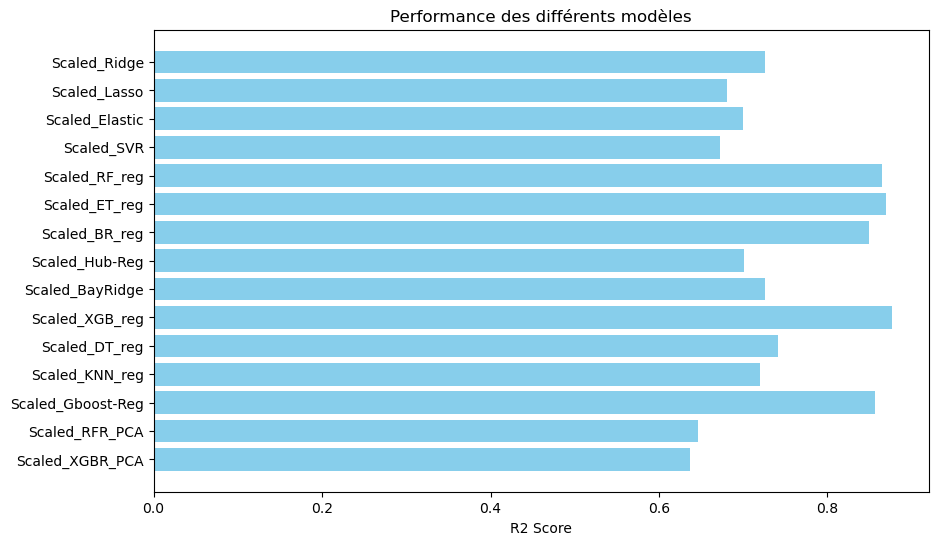

In [49]:
# Liste des résultats et noms des modèles
results = [0.725729, 0.680499, 0.699998, 0.671885, 0.864318, 0.869143, 0.849139, 0.701487, 0.725839, 0.876274, 0.741228, 0.719752, 0.855890, 0.646805, 0.637179]
names = ['Scaled_Ridge', 'Scaled_Lasso', 'Scaled_Elastic', 'Scaled_SVR', 'Scaled_RF_reg', 'Scaled_ET_reg', 'Scaled_BR_reg', 'Scaled_Hub-Reg', 'Scaled_BayRidge', 'Scaled_XGB_reg', 'Scaled_DT_reg', 'Scaled_KNN_reg', 'Scaled_Gboost-Reg', 'Scaled_RFR_PCA', 'Scaled_XGBR_PCA']

# Affichage du graphique
plt.figure(figsize=(10, 6))
plt.barh(names, results, color='skyblue')
plt.xlabel('R2 Score')
plt.title('Performance des différents modèles')
plt.gca().invert_yaxis()
plt.show()

In [146]:
# conserver que ceux qui ont un r2 > 0.8

filtered_results = [result for result, name in zip(results, names) if result > 0.8]
filtered_names = [name for result, name in zip(results, names) if result > 0.8]

print("Modèles avec un R2 supérieur à 0.8 :")
for name, result in zip(filtered_names, filtered_results):
    print(f"{name}: R2 = {result}")

Modèles avec un R2 supérieur à 0.8 :
Scaled_RF_reg: R2 = 0.864318
Scaled_ET_reg: R2 = 0.869143
Scaled_BR_reg: R2 = 0.849139
Scaled_XGB_reg: R2 = 0.876274
Scaled_Gboost-Reg: R2 = 0.85589


### Testons ces différents modèles

In [148]:
# RandomForestRegressor

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=20, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

y_RDF = rf_random.predict(X_test)

# MSE
MSE_RDF = mean_squared_error(test.iloc[:,0],y_RDF)
MSE_RDF

Fitting 3 folds for each of 100 candidates, totalling 300 fits


1.6355026142496234

In [149]:
# ExtraTreesRegressor

# Créer le modèle de base à régler
extra_trees = ExtraTreesRegressor()

# Définir la grille des hyperparamètres à explorer
random_grid = {
    'n_estimators': [50, 100, 150, 200],  # Nombre d'arbres dans la forêt
    'max_depth': [None, 10, 20, 30],  # Profondeur maximale de chaque arbre
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons requis pour diviser un nœud interne
    'min_samples_leaf': [1, 2, 4],  # Nombre minimum d'échantillons requis pour être à un nœud feuille
    'max_features': ['auto', 'sqrt'],  # Nombre maximum de fonctionnalités à rechercher pour la meilleure répartition
    'bootstrap': [True, False]  # Méthode d'échantillonnage des observations pour la construction de chaque arbre
}

# Initialiser la recherche aléatoire des hyperparamètres
extra_trees_random = RandomizedSearchCV(estimator=extra_trees, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=20, n_jobs=-1)

# Exécuter la recherche aléatoire des hyperparamètres
extra_trees_random.fit(X_train, y_train)

y_EXT = extra_trees_random.predict(X_test)

# MSE
MSE_EXT = mean_squared_error(test.iloc[:,0],y_EXT)
MSE_EXT


Fitting 3 folds for each of 100 candidates, totalling 300 fits


1.9536389488426322

In [150]:
# BaggingRegressor


# Définir la grille des hyperparamètres
random_grid = {
    'n_estimators': randint(10, 100),
    'max_samples': [0.5, 0.7, 0.8, 1.0],
    'max_features': [0.5, 0.7, 0.8, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

# Créer le modèle de BaggingRegressor
br = BaggingRegressor()

# Recherche aléatoire des hyperparamètres
br_random = RandomizedSearchCV(estimator = br, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=20, n_jobs = -1)

# Ajuster le modèle aux données d'entraînement
br_random.fit(X_train, y_train)

y_BAGG = br_random.predict(X_test)

# MSE
MSE_BAGG = mean_squared_error(test.iloc[:,0],y_BAGG)
MSE_BAGG

Fitting 3 folds for each of 100 candidates, totalling 300 fits


1.732260395927662

In [151]:
# XGBRegressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train, y_train)
y_XGB = xgb.predict(X_test)

# MSE
MSE_XGB = mean_squared_error(test.iloc[:,0],y_XGB)
MSE_XGB

1.3494425837432427

In [153]:
# GradientBoostingRegressor

# Définir la grille des hyperparamètres
random_grid = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2']
}

# Créer le modèle de GradientBoostingRegressor
gb = GradientBoostingRegressor()

# Recherche aléatoire des hyperparamètres
gb_random = RandomizedSearchCV(estimator = gb, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=20, n_jobs = -1)

# Ajuster le modèle aux données d'entraînement
gb_random.fit(X_train, y_train)

y_GRAD = gb_random.predict(X_test)

# MSE
MSE_GRAD = mean_squared_error(test.iloc[:,0],y_GRAD)
MSE_GRAD

Fitting 3 folds for each of 100 candidates, totalling 300 fits


1.3304452124759936

In [47]:
best_model = min(MSE_RDF, MSE_EXT, MSE_BAGG, MSE_XGB, MSE_GRAD)

if best_model == MSE_RDF:
    print("Meilleur modèle : RandomForestRegressor")
elif best_model == MSE_EXT:
    print("Meilleur modèle : ExtraTreesRegressor")
elif best_model == MSE_BAGG:
    print("Meilleur modèle : BaggingRegressor")
elif best_model == MSE_XGB:
    print("Meilleur modèle : XGBRegressor")
else:
    print("Meilleur modèle : GradientBoostingRegressor")

NameError: name 'MSE_RDF' is not defined

# PARTIE II - PREDICTION DES SERIES TEMPORELLES

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.api import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

In [297]:
# Load the data:
alcohol= pd.read_csv('Alcohol.csv', sep=';', index_col=0)
#alcohol.index = pd.to_datetime(alcohol.index)

In [298]:
# examine the loaded data: 
alcohol

,Volume
Date,
01/01/2011,3459
01/02/2011,3458
01/03/2011,4002
01/04/2011,4564
01/05/2011,4221
...,...
01/08/2023,7396
01/09/2023,7259
01/10/2023,7268


In [299]:
# the number of rows and columns of this dataframe
alcohol.shape

(156, 1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


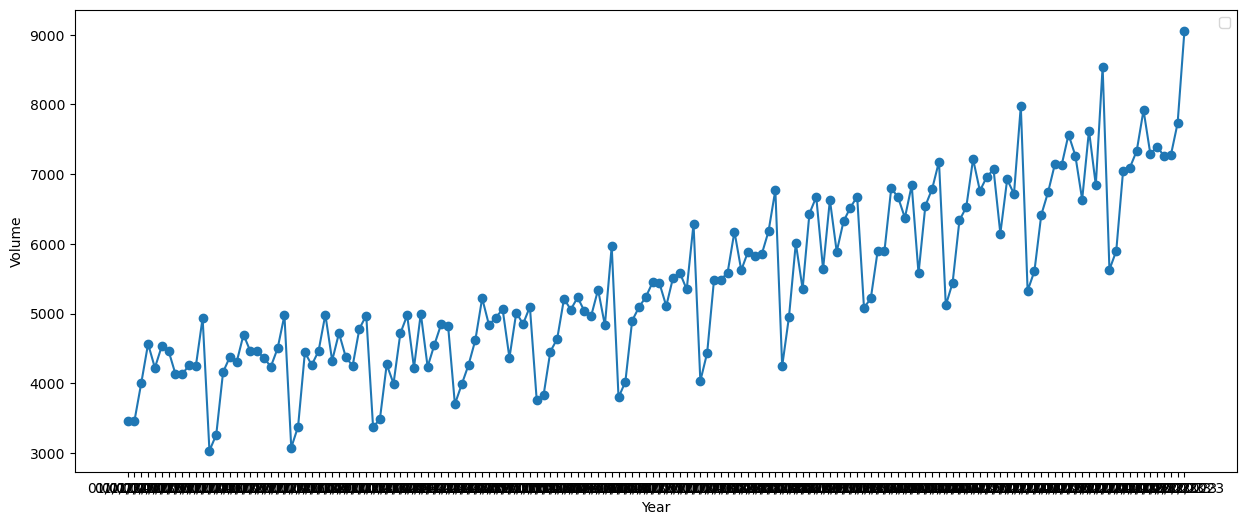

In [300]:
# We will now plot this time series:
# plot the time series 
plt.figure(figsize = (15,6))
plt.plot(alcohol, marker = 'o')
plt.xlabel("Year")
plt.ylabel("Volume")
plt.legend(loc = 'best')

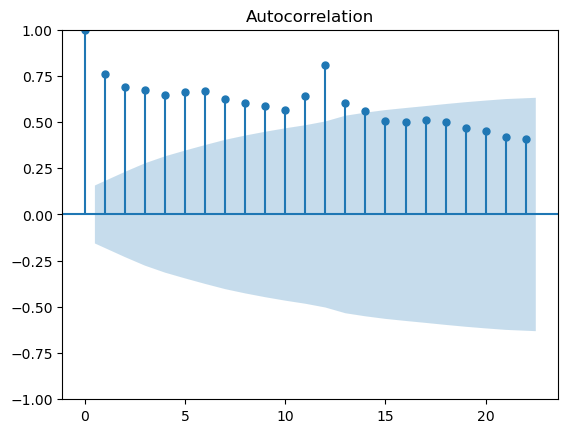

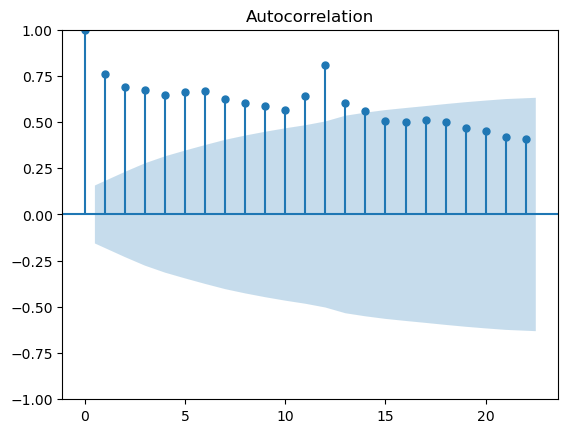

In [301]:
# autocorrelation graph
plot_acf(alcohol)

In [302]:
# Split the time series into a training and a validation set
alcohol_train = alcohol.iloc[:100,:]
alcohol_valid = alcohol.iloc[100:,:]

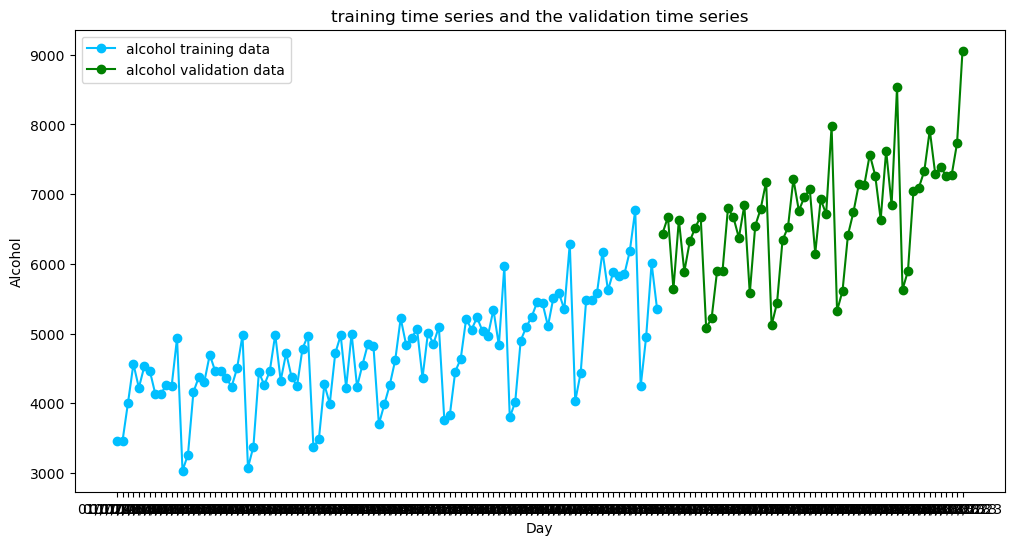

In [303]:
# Plot the training and validation set with a different color
plt.figure(figsize=(12, 6))
plt.plot(alcohol_train, marker = 'o', color = 'DeepSkyBlue', label = 'alcohol training data')
plt.plot(alcohol_valid, marker = 'o', color = 'green', label = 'alcohol validation data')
plt.title("training time series and the validation time series")
plt.xlabel("Day") 
plt.ylabel("Alcohol")
plt.legend(loc = 'best') 

In [48]:
# We will now apply the Triple Exponential Smoothing algorithm to the training data (additive model first)
# As you can see below, we need to indicate the length of the period in 'seasonal_periods', and 
# we specify sesaonal = 'add' for an additive model (trend will always be 'add' for us)
tes_model = ExponentialSmoothing(alcohol_train, initialization_method='estimated',seasonal_periods=12, trend = 'add', seasonal = 'add').fit()
tes_model.summary()

NameError: name 'ExponentialSmoothing' is not defined

In [305]:
# To see the evolution of the parameter a throughout the TES algorithm you can ask:
a_params = tes_model.level
a_params

Date
01/01/2011    4189.182286
01/02/2011    4200.417077
01/03/2011    4186.820253
01/04/2011    4236.987486
01/05/2011    4207.140774
                 ...     
01/12/2018    5829.749519
01/01/2019    5808.484619
01/02/2019    5839.982315
01/03/2019    5902.470470
01/04/2019    5879.998652
Length: 100, dtype: float64

In [306]:
# To see the evolution of the parameter b throughout the TES algorithm you can ask:
b_params = tes_model.trend
b_params

Date
01/01/2011    -1.211809
01/02/2011     0.238401
01/03/2011    -1.373604
01/04/2011     4.631654
01/05/2011     0.614423
                ...    
01/12/2018    46.315365
01/01/2019    38.441280
01/02/2019    37.632252
01/03/2019    40.528326
01/04/2019    33.187892
Length: 100, dtype: float64

In [307]:
# To see the evolution of the seasonal coefficients throughout the TES algorithm you can ask:
tes_model.season

Date
01/01/2011   -1057.565557
01/02/2011    -835.053572
01/03/2011     -81.848608
01/04/2011     -56.591280
01/05/2011     270.471898
                 ...     
01/12/2018     634.113513
01/01/2019   -1062.503928
01/02/2019    -836.303195
01/03/2019     -79.465892
01/04/2019     -58.106490
Length: 100, dtype: float64

In [308]:
# the last 12 seasonal coefficients estimated
seasonal_coef = tes_model.season[-12:]
seasonal_coef

Date
01/05/2018     271.829110
01/06/2018     465.266982
01/07/2018     109.133298
01/08/2018     273.046911
01/09/2018     -11.684899
01/10/2018      63.259800
01/11/2018     258.222753
01/12/2018     634.113513
01/01/2019   -1062.503928
01/02/2019    -836.303195
01/03/2019     -79.465892
01/04/2019     -58.106490
dtype: float64

In [309]:
# the predictions of the 2 first point of the validation set
first_point = (a_params[-1] + b_params[-1] + seasonal_coef[0], a_params[-1] + 2 * b_params[-1] + seasonal_coef[1])
first_point

(6185.015653472582, 6411.64141761713)

In [310]:
# These predictions can be obtained by the following command : 
tes_model.forecast(2)

100    6185.015653
101    6411.641418
dtype: float64

In [311]:
# the predictions for the whole validation set

predictions_data_add = tes_model.forecast(len(alcohol_valid))
predictions_data_add = pd.DataFrame(predictions_data_add,columns=['Volume'])
predictions_data_add.head()

,Volume
100,6185.015653
101,6411.641418
102,6088.695626
103,6285.797131
104,6034.253213


In [312]:
predictions_data_add.index = alcohol_valid.index

In [313]:
predictions_data_add.head()

,Volume
Date,
01/05/2019,6185.015653
01/06/2019,6411.641418
01/07/2019,6088.695626
01/08/2019,6285.797131
01/09/2019,6034.253213


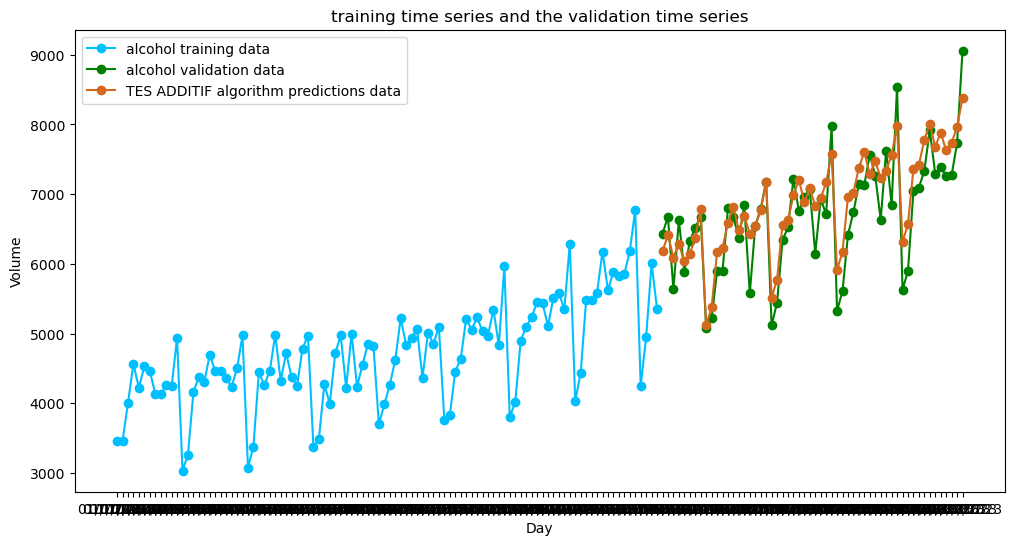

In [314]:
# Plot on a graph the training, validation data and the predictions made by the TES algorithm

plt.figure(figsize=(12, 6))
plt.plot(alcohol_train, marker = 'o', color = 'DeepSkyBlue', label = 'alcohol training data')
plt.plot(alcohol_valid, marker = 'o', color = 'green', label = 'alcohol validation data')
plt.plot(predictions_data_add, marker = 'o', color = 'Chocolate', label = 'TES ADDITIF algorithm predictions data')
plt.title("training time series and the validation time series")
plt.xlabel("Day") 
plt.ylabel("Volume")
plt.legend(loc = 'best')

In [315]:
# the squared prediction error on the validation set
EQM_TES_ADD = np.mean((predictions_data_add - alcohol_valid)**2)
EQM_TES_ADD

Volume    148702.422955
dtype: float64

In [316]:
# We will now try a model with a multiplicative seasonal composant. 
# For this, you need to specify seasonal = 'mul' in the call of the Exponenatial smoothing function : 
tes_model = ExponentialSmoothing(alcohol_train, initialization_method='estimated',seasonal_periods=12, trend = 'add', seasonal = 'mul').fit()
tes_model.summary()

Dep. Variable:,Volume,No. Observations:,100
Model:,ExponentialSmoothing,SSE,4322517.575
Optimized:,True,AIC,1099.418
Trend:,Additive,BIC,1141.101
Seasonal:,Multiplicative,AICC,1107.862
Seasonal Periods:,12,Date:,"Sun, 28 Apr 2024"
Box-Cox:,False,Time:,23:50:14
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1109159,alpha,True
smoothing_trend,0.0986092,beta,True


In [317]:
# To see the evolution of the parameter a throughout the TES algorithm you can ask:
a_params = tes_model.level
a_params

Date
01/01/2011    4179.877690
01/02/2011    4180.799147
01/03/2011    4163.005722
01/04/2011    4207.883685
01/05/2011    4184.680603
                 ...     
01/12/2018    5662.881583
01/01/2019    5676.738386
01/02/2019    5740.669952
01/03/2019    5804.272770
01/04/2019    5790.530868
Length: 100, dtype: float64

In [318]:
# To see the evolution of the parameter b throughout the TES algorithm you can ask:
b_params = tes_model.trend
b_params

Date
01/01/2011     2.439667
01/02/2011     2.289958
01/03/2011     0.309552
01/04/2011     4.704406
01/05/2011     1.952472
                ...    
01/12/2018    37.719143
01/01/2019    35.366098
01/02/2019    38.182915
01/03/2019    40.689550
01/04/2019    35.322110
Length: 100, dtype: float64

In [319]:
seasonal_coef = tes_model.season[-12:]
seasonal_coef

Date
01/05/2018    1.065653
01/06/2018    1.110431
01/07/2018    1.051683
01/08/2018    1.066339
01/09/2018    1.020462
01/10/2018    1.052636
01/11/2018    1.065418
01/12/2018    1.173039
01/01/2019    0.773496
01/02/2019    0.829534
01/03/2019    0.999998
01/04/2019    0.999764
dtype: float64

In [320]:
first_point = ((a_params[-1] + b_params[-1]) * seasonal_coef[0], (a_params[-1] + 2 * b_params[-1]) * seasonal_coef[1])
first_point

(6208.335044508471, 6508.42954251774)

In [321]:
# These predictions can be obtained by the command:
tes_model.forecast(2)

100    6208.335045
101    6508.429543
dtype: float64

In [322]:
# the predictions for the whole validation set

predictions_data_mult = tes_model.forecast(len(alcohol_valid))
predictions_data_mult = pd.DataFrame(predictions_data_mult, columns=['Volume'])
predictions_data_mult.index = alcohol_valid.index
predictions_data_mult.head()

,Volume
Date,
01/05/2019,6208.335045
01/06/2019,6508.429543
01/07/2019,6201.244721
01/08/2019,6325.329246
01/09/2019,6089.238801


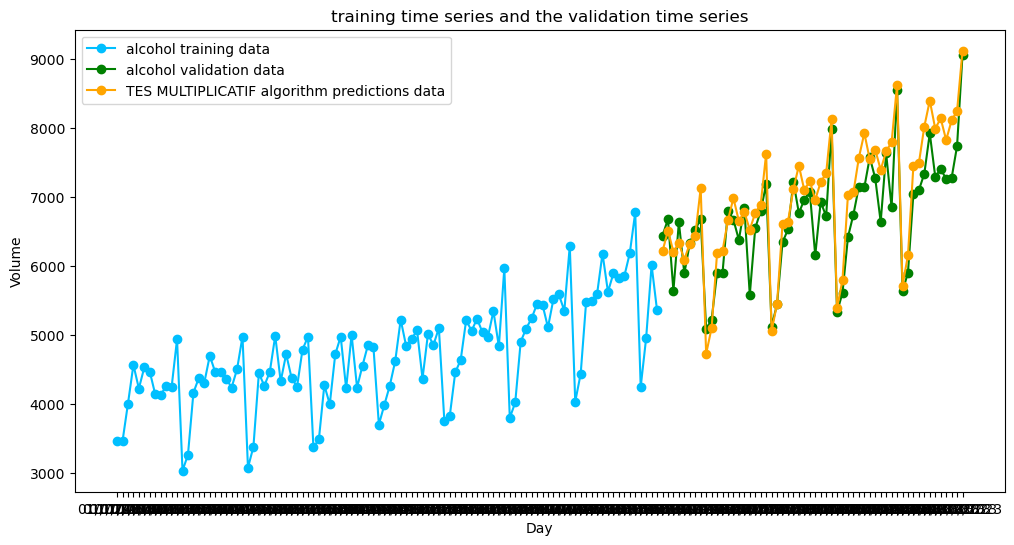

In [323]:
# Plot on a graph the training, validation data and the predictions made by the TES algorithm

plt.figure(figsize=(12, 6))
plt.plot(alcohol_train, marker = 'o', color = 'DeepSkyBlue', label = 'alcohol training data')
plt.plot(alcohol_valid, marker = 'o', color = 'green', label = 'alcohol validation data')
plt.plot(predictions_data_mult, marker = 'o', color = 'Orange', label = 'TES MULTIPLICATIF algorithm predictions data')
plt.title("training time series and the validation time series")
plt.xlabel("Day") 
plt.ylabel("Volume")
plt.legend(loc = 'best')

In [324]:
# the squared prediction error on the validation
EQM_TES_MULT = np.mean((predictions_data_mult - alcohol_valid)**2)
EQM_TES_MULT

Volume    187298.798612
dtype: float64

## Classical AutoRegressive models (no trend no season)

In [325]:
actual_BIC_value = (40, 1000)

for i in range (1, 40):
    arc_model = AutoReg(alcohol_train, lags = i, trend = 'c').fit()
    compare = min(actual_BIC_value[1], arc_model.bic)
    if compare == arc_model.bic:
        actual_BIC_value = (i, compare)

print(f"the best bic is : {actual_BIC_value}")

the best bic is : (39, 915.1339131336422)


In [326]:
AR = AutoReg(alcohol_train, lags = 39, trend = 'c', period = 12).fit()

# the predictions for the whole validation set

predictions_data_arc = arc_model.forecast(len(alcohol_valid))
predictions_data_arc = pd.DataFrame(predictions_data_arc, columns=['Volume'])
predictions_data_arc.index = alcohol_valid.index
predictions_data_arc.head()

,Volume
Date,
01/05/2019,6661.273842
01/06/2019,6644.332205
01/07/2019,5989.246076
01/08/2019,6705.474573
01/09/2019,6208.162925


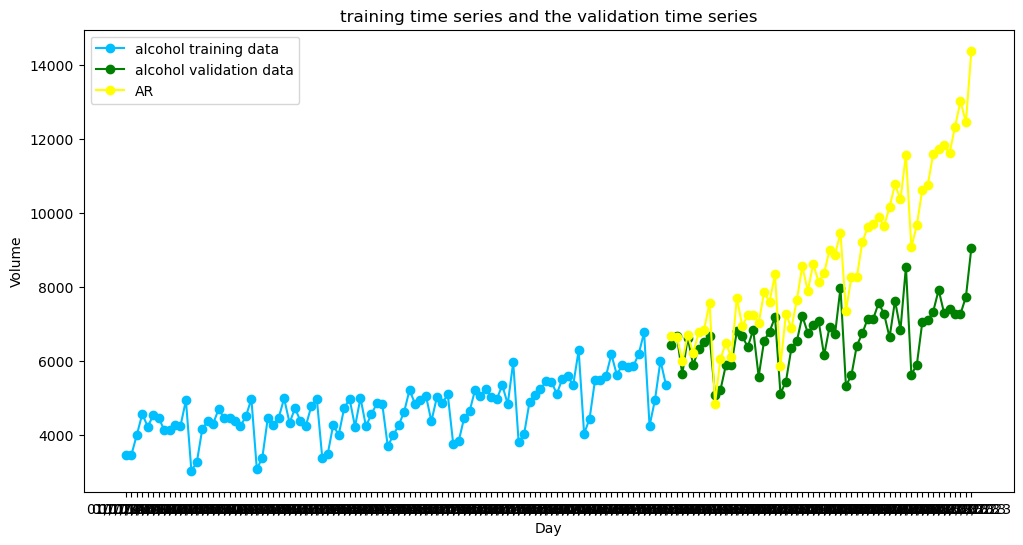

In [327]:
# Plot on a graph the training, validation data and the predictions made by the TES algorithm

plt.figure(figsize=(12, 6))
plt.plot(alcohol_train, marker = 'o', color = 'DeepSkyBlue', label = 'alcohol training data')
plt.plot(alcohol_valid, marker = 'o', color = 'green', label = 'alcohol validation data')
plt.plot(predictions_data_arc, marker = 'o', color = 'yellow', label = 'AR')
plt.title("training time series and the validation time series")
plt.xlabel("Day") 
plt.ylabel("Volume")
plt.legend(loc = 'best') 

In [328]:
# the squared prediction error on the validation
EQM_AR = np.mean((predictions_data_arc - alcohol_valid)**2)
EQM_AR

Volume    6.414213e+06
dtype: float64

## AutoRegressive models with trend

In [329]:
# classical AR models and select the best order for this time series
actual_BIC_value = (40, 1000)

for i in range (1, 40):
    arc_model = AutoReg(alcohol_train, lags = i, trend = 'ct').fit()
    compare = min(actual_BIC_value[1], arc_model.bic)
    if compare == arc_model.bic:
        actual_BIC_value = (i, compare)

print(f"the best bic is : {actual_BIC_value}")

the best bic is : (39, 917.7287601177828)


In [330]:
ART = AutoReg(alcohol_train, lags = 39, trend = 'c',seasonal=True, period = 12).fit()

# the predictions for the whole validation set

predictions_data_arc_with_trend = ART.forecast(len(alcohol_valid))
predictions_data_arc_with_trend = pd.DataFrame(predictions_data_arc_with_trend, columns=['Volume'])
predictions_data_arc_with_trend.index = alcohol_valid.index
predictions_data_arc_with_trend.head()

,Volume
Date,
01/05/2019,6489.815305
01/06/2019,6537.321995
01/07/2019,5988.713436
01/08/2019,6794.006385
01/09/2019,6416.752457


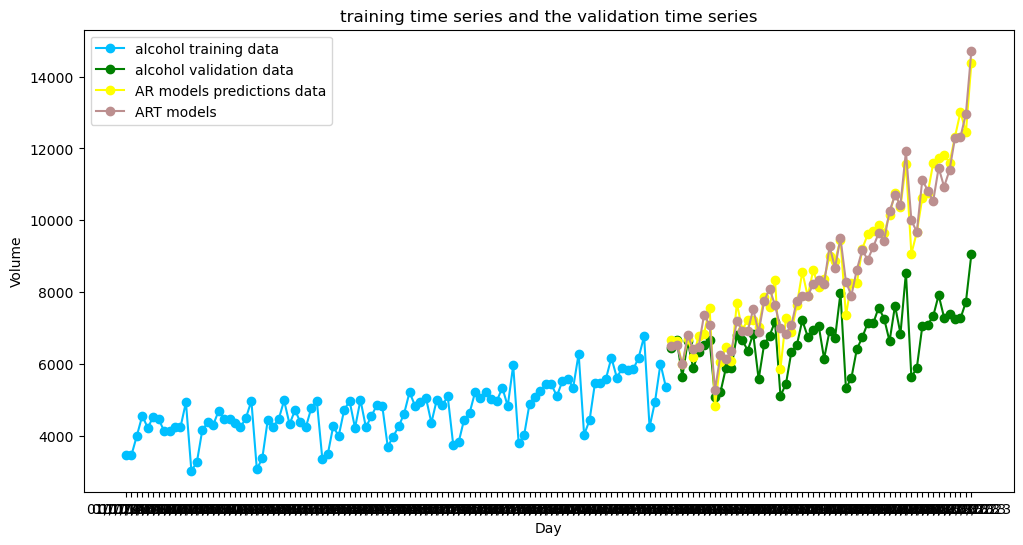

In [331]:
# Plot on a graph the training, validation data and the predictions made by the TES algorithm

plt.figure(figsize=(12, 6))
plt.plot(alcohol_train, marker = 'o', color = 'DeepSkyBlue', label = 'alcohol training data')
plt.plot(alcohol_valid, marker = 'o', color = 'green', label = 'alcohol validation data')
plt.plot(predictions_data_arc, marker = 'o', color = 'yellow', label = 'AR models predictions data')
plt.plot(predictions_data_arc_with_trend, marker = 'o', color = 'RosyBrown', label = 'ART models')
plt.title("training time series and the validation time series")
plt.xlabel("Day") 
plt.ylabel("Volume")
plt.legend(loc = 'best') 

In [332]:
# the squared prediction error on the validation
EQM_ART = np.mean((predictions_data_arc_with_trend - alcohol_valid)**2)
EQM_ART

Volume    6.286821e+06
dtype: float64

## AutoRegressive models with seasonal component

In [333]:
# We will now apply a seasonal AR model of order 1 without trend (to start):
# For this, you need to specify seasonal = True and to indicate the period of the seasonal component (12 here)
ARS = AutoReg(alcohol_train, lags = 1, trend = 'c',seasonal=True, period = 12).fit()
ARS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                 Volume   No. Observations:                  100
Model:               Seas. AutoReg(1)   Log Likelihood                -709.913
Method:               Conditional MLE   S.D. of innovations            314.789
Date:                Sun, 28 Apr 2024   AIC                           1447.827
Time:                        23:50:28   BIC                           1484.158
Sample:                             1   HQIC                          1462.527
                                  100                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -875.7049    339.897     -2.576      0.010   -1541.891    -209.518
s(2,12)     1778.0128    188.232      9.446      0.000    1409.086    2146.940
s(3,12)     2363.0943    179.806     13.142      0.000    2010.680    2715.508
s(4,12)     1752.0644    160.238     10.934      0.000    1438.005    2066.124
s(5,12)     1942.7107    165.101     11.767      0.000    1619.118    2266.303
s(6,12)     1962.1795    161.390     12.158      0.000    1645.861    2278.498
s(7,12)     1532.9348    159.053      9.638      0.000    1221.197    1844.673
s(8,12)     1826.7000    161.817     11.289      0.000    1509.545    2143.855
s(9,12)     1550.6894    160.694      9.650      0.000    1235.734    1865.645
s(10,12)    1881.1452    163.518     11.504      0.000    1560.657    2201.634
s(11,12)    1809.3858    161.187     11.225      0.000    1493.466    2125.306
s(12,12)    2288.6354    160.438     14.265      0.000    1974.183    2603.088
Volume.L1      0.8217      0.059     14.015      0.000       0.707       0.937
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2171           +0.0000j            1.2171            0.0000
-----------------------------------------------------------------------------
"""

In [334]:
# classical AR models and select the best order for this time series
actual_BIC_value = (40, 1000)

for i in range (1, 40):
    ARS = AutoReg(alcohol_train, lags = i, trend = 'c',seasonal=True, period = 12).fit()
    compare = min(actual_BIC_value[1], ARS.bic)
    if compare == ARS.bic:
        actual_BIC_value = (i, compare)

print(f"the best bic is : {actual_BIC_value}")

the best bic is : (39, 916.5088208533675)


In [335]:
ARS = AutoReg(alcohol_train, lags = 39, trend = 'c',seasonal=True, period = 12).fit()

# the predictions for the whole validation set

predictions_data_arc_with_season = ARS.forecast(len(alcohol_valid))
predictions_data_arc_with_season = pd.DataFrame(predictions_data_arc_with_season, columns=['Volume'])
predictions_data_arc_with_season.index = alcohol_valid.index
predictions_data_arc_with_season.head()

,Volume
Date,
01/05/2019,6489.815305
01/06/2019,6537.321995
01/07/2019,5988.713436
01/08/2019,6794.006385
01/09/2019,6416.752457


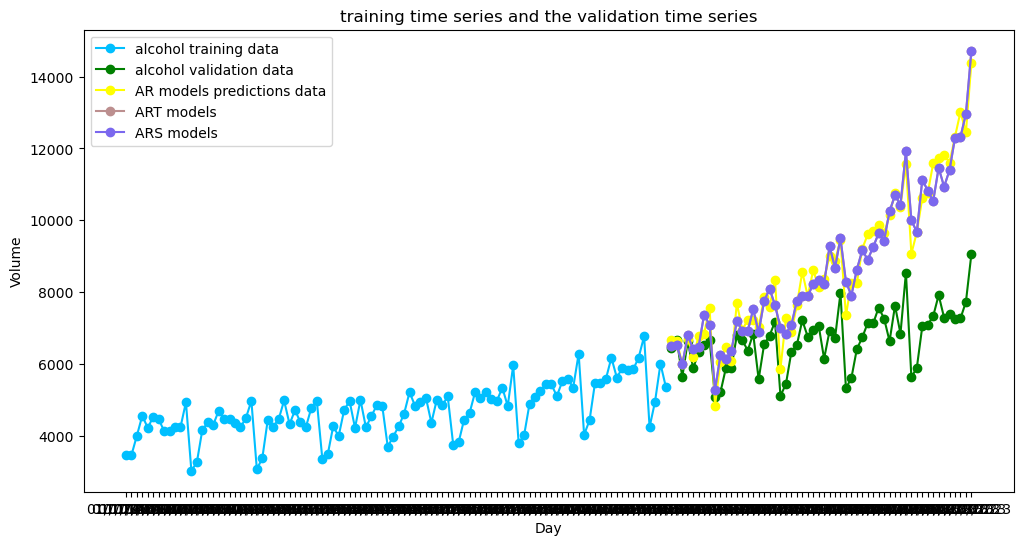

In [336]:
# Plot on a graph the training, validation data and the predictions made by the TES algorithm

plt.figure(figsize=(12, 6))
plt.plot(alcohol_train, marker = 'o', color = 'DeepSkyBlue', label = 'alcohol training data')
plt.plot(alcohol_valid, marker = 'o', color = 'green', label = 'alcohol validation data')
plt.plot(predictions_data_arc, marker = 'o', color = 'yellow', label = 'AR models predictions data')
plt.plot(predictions_data_arc_with_trend, marker = 'o', color = 'RosyBrown', label = 'ART models')
plt.plot(predictions_data_arc_with_season, marker = 'o', color = 'MediumSlateBlue', label = 'ARS models')
plt.title("training time series and the validation time series")
plt.xlabel("Day") 
plt.ylabel("Volume")
plt.legend(loc = 'best') 

In [337]:
# the squared prediction error on the validation
EQM_ARS = np.mean((predictions_data_arc_with_season - alcohol_valid)**2)
EQM_ARS

Volume    6.286821e+06
dtype: float64

## AutoRegressive models with seasonal component

In [338]:
# classical AR models and select the best order for this time series
actual_BIC_value = (40, 1000)

for i in range (1, 40):
    ARTS = AutoReg(alcohol_train, lags = i, trend = 'ct',seasonal=True, period=12).fit()
    compare = min(actual_BIC_value[1], ARTS.bic)
    if compare == ARTS.bic:
        actual_BIC_value = (i, compare)

print(f"the best bic is : {actual_BIC_value}")

the best bic is : (39, 919.0001601730894)


In [339]:
ARTS = AutoReg(alcohol_train, lags = 39, trend = 'ct',seasonal=True, period = 12).fit()

# the predictions for the whole validation set

predictions_data_ARTS = ARTS.forecast(len(alcohol_valid))
predictions_data_ARTS = pd.DataFrame(predictions_data_ARTS, columns=['Volume'])
predictions_data_ARTS.index = alcohol_valid.index
predictions_data_ARTS.head()

,Volume
Date,
01/05/2019,6394.328076
01/06/2019,6547.954594
01/07/2019,5855.674792
01/08/2019,6792.705846
01/09/2019,6327.441045


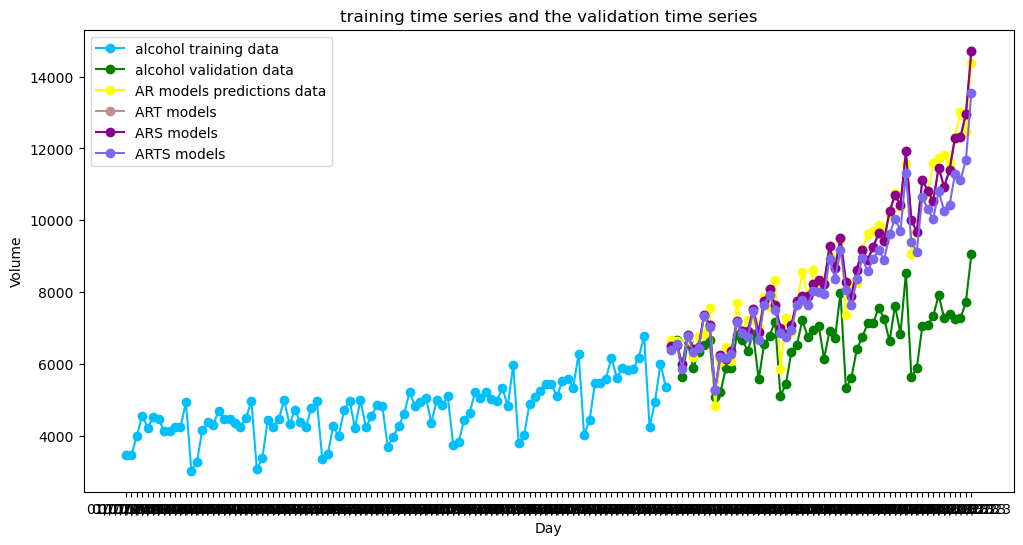

In [340]:
# Plot on a graph the training, validation data and the predictions made by the TES algorithm

plt.figure(figsize=(12, 6))
plt.plot(alcohol_train, marker = 'o', color = 'DeepSkyBlue', label = 'alcohol training data')
plt.plot(alcohol_valid, marker = 'o', color = 'green', label = 'alcohol validation data')
plt.plot(predictions_data_arc, marker = 'o', color = 'yellow', label = 'AR models predictions data')
plt.plot(predictions_data_arc_with_trend, marker = 'o', color = 'RosyBrown', label = 'ART models')
plt.plot(predictions_data_arc_with_season, marker = 'o', color = 'DarkMagenta', label = 'ARS models')
plt.plot(predictions_data_ARTS, marker = 'o', color = 'MediumSlateBlue', label = 'ARTS models')
plt.title("training time series and the validation time series")
plt.xlabel("Day") 
plt.ylabel("Volume")
plt.legend(loc = 'best') 

In [341]:
# the squared prediction error on the validation
EQM_ARTS = np.mean((predictions_data_ARTS - alcohol_valid)**2)
EQM_ARTS

Volume    4.243193e+06
dtype: float64

In [342]:
# compare the differents models 

# Best model

compare = min(EQM_TES_ADD[0], EQM_TES_MULT[0], EQM_AR[0], EQM_ART[0], EQM_ARS[0], EQM_ARTS[0])

if compare == EQM_TES_ADD[0]:
    print("le meilleur modèle est : La prédictions TES ADDITIF algorithm")
elif compare == EQM_TES_MULT[0]:
    print("le meilleur modèle est : La prédiction TES MULTIPLICATIF algorithm")
elif compare == EQM_AR[0]:
    print("le meilleur modèle est : La prédiction Auto-regressive Classic")
elif compare == EQM_ART[0]:
    print("le meilleur modèle est : La prédiction Auto-regressive avec tendance")
elif compare == EQM_ARS[0]:
    print("le meilleur modèle est : La prédiction Auto-regressive avec saison")
else: 
    print("le meilleur modèle est : La prédiction par Auto-regressive avec tendance et saison")

le meilleur modèle est : La prédictions TES ADDITIF algorithm
